## BBL

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans 
from scipy.stats import zscore 
from sklearn.metrics import silhouette_score 

import warnings
warnings.filterwarnings('ignore')

## DATA PREPROCESSING

In [2]:
df3 =pd.read_csv('BigBash_Bat.csv')
df3.head()

PLAYER             TEAM  INNINGS  NOT OUT   RUNS   HS  \
0      Alex Hales   Sydney Thunder     15.0      1.0  537.0  110   
1     James Vince    Sydney Sixers     16.0      2.0  536.0  98*   
2  Josh Phillippe    Sydney Sixers     16.0      0.0  504.0   95   
3      Chris Lynn    Brisbane Heat     13.0      0.0  456.0   69   
4     Colin Munro  Perth Scorchers     15.0      1.0  443.0   82   

           AVERAGE  BALL FACED  STRIKE RATE  100'S  50'S   4'S   6'S  
0  38.357142857143       336.0   159.821429    1.0   3.0  54.0  30.0  
1  38.285714285714       374.0   143.315508    0.0   4.0  59.0  11.0  
2             31.5       340.0   148.235294    0.0   3.0  55.0  14.0  
3  35.076923076923       296.0   154.054054    0.0   5.0  39.0  26.0  
4  31.642857142857       346.0   128.034682    0.0   4.0  32.0  19.0

In [3]:
best_scores_bat=[]
best_scores_ball=[]

In [4]:
print("Batting Data Info:")
df3.info()
print("\nDuplicated rows in Batting Data:", df3[df3.duplicated()].shape[0])

Batting Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PLAYER       138 non-null    object 
 1   TEAM         138 non-null    object 
 2   INNINGS      138 non-null    float64
 3   NOT OUT      138 non-null    float64
 4   RUNS         138 non-null    float64
 5   HS           138 non-null    object 
 6   AVERAGE      138 non-null    object 
 7   BALL FACED   138 non-null    float64
 8   STRIKE RATE  138 non-null    float64
 9   100'S        138 non-null    float64
 10  50'S         138 non-null    float64
 11  4'S          138 non-null    float64
 12  6'S          138 non-null    float64
dtypes: float64(9), object(4)
memory usage: 15.4+ KB

Duplicated rows in Batting Data: 11


In [5]:
df3.shape
print(f"The batting dataset has {df3.shape[0]} rows, and {df3.shape[1]} columns.")

The batting dataset has 150 rows, and 13 columns.


In [6]:
df3 = df3.reset_index(drop=True)

In [7]:
df3.isna().sum()

PLAYER         12
TEAM           12
INNINGS        12
NOT OUT        12
RUNS           12
HS             12
AVERAGE        12
BALL FACED     12
STRIKE RATE    12
100'S          12
50'S           12
4'S            12
6'S            12
dtype: int64

In [8]:
df3=df3.dropna(axis=0)

In [9]:
df3.describe().T

count        mean         std  min    25%         50%  \
INNINGS      138.0    6.985507    4.882541  1.0    3.0    6.000000   
NOT OUT      138.0    1.442029    1.674271  0.0    0.0    1.000000   
RUNS         138.0  129.710145  144.961822  0.0   12.0   61.500000   
BALL FACED   138.0   98.731884  105.540426  1.0   12.0   51.000000   
STRIKE RATE  138.0  112.931502   41.343768  0.0  100.0  123.038462   
100'S        138.0    0.014493    0.119946  0.0    0.0    0.000000   
50'S         138.0    0.608696    1.097008  0.0    0.0    0.000000   
4'S          138.0   11.362319   14.004661  0.0    1.0    4.000000   
6'S          138.0    4.637681    6.154865  0.0    0.0    2.000000   

                    75%         max  
INNINGS       12.000000   16.000000  
NOT OUT        2.000000    9.000000  
RUNS         219.250000  537.000000  
BALL FACED   164.000000  374.000000  
STRIKE RATE  137.937063  205.714286  
100'S          0.000000    1.000000  
50'S           1.000000    5.000000  
4'S           19.000000   59.000000  
6'S            7.000000   30.000000

## BATTING DATA

In [10]:
df3.head()

PLAYER             TEAM  INNINGS  NOT OUT   RUNS   HS  \
0      Alex Hales   Sydney Thunder     15.0      1.0  537.0  110   
1     James Vince    Sydney Sixers     16.0      2.0  536.0  98*   
2  Josh Phillippe    Sydney Sixers     16.0      0.0  504.0   95   
3      Chris Lynn    Brisbane Heat     13.0      0.0  456.0   69   
4     Colin Munro  Perth Scorchers     15.0      1.0  443.0   82   

           AVERAGE  BALL FACED  STRIKE RATE  100'S  50'S   4'S   6'S  
0  38.357142857143       336.0   159.821429    1.0   3.0  54.0  30.0  
1  38.285714285714       374.0   143.315508    0.0   4.0  59.0  11.0  
2             31.5       340.0   148.235294    0.0   3.0  55.0  14.0  
3  35.076923076923       296.0   154.054054    0.0   5.0  39.0  26.0  
4  31.642857142857       346.0   128.034682    0.0   4.0  32.0  19.0

In [11]:
df3.rename(columns={
    'PLAYER': 'Player',
    'INNINGS': 'Inns',
    'NOT OUT': 'No',
    'RUNS': 'Runs',
    'HS': 'Hs',
    'AVERAGE': 'Avg',
    'BALL FACED': 'BF',
    'STRIKE RATE': 'Strikerate',
    "100'S": '100',
    "50'S": '50',
    "4'S": '4s',
    "6'S": '6s'
}, inplace=True)
df3.head()

Player             TEAM  Inns   No   Runs   Hs              Avg  \
0      Alex Hales   Sydney Thunder  15.0  1.0  537.0  110  38.357142857143   
1     James Vince    Sydney Sixers  16.0  2.0  536.0  98*  38.285714285714   
2  Josh Phillippe    Sydney Sixers  16.0  0.0  504.0   95             31.5   
3      Chris Lynn    Brisbane Heat  13.0  0.0  456.0   69  35.076923076923   
4     Colin Munro  Perth Scorchers  15.0  1.0  443.0   82  31.642857142857   

      BF  Strikerate  100   50    4s    6s  
0  336.0  159.821429  1.0  3.0  54.0  30.0  
1  374.0  143.315508  0.0  4.0  59.0  11.0  
2  340.0  148.235294  0.0  3.0  55.0  14.0  
3  296.0  154.054054  0.0  5.0  39.0  26.0  
4  346.0  128.034682  0.0  4.0  32.0  19.0

In [12]:
df3['100']=df3['100'].astype(int)
df3['50']=df3['50'].astype(int)
df3['4s']=df3['4s'].astype(int)
df3['6s']=df3['6s'].astype(int)

In [13]:
df3.head()

Player             TEAM  Inns   No   Runs   Hs              Avg  \
0      Alex Hales   Sydney Thunder  15.0  1.0  537.0  110  38.357142857143   
1     James Vince    Sydney Sixers  16.0  2.0  536.0  98*  38.285714285714   
2  Josh Phillippe    Sydney Sixers  16.0  0.0  504.0   95             31.5   
3      Chris Lynn    Brisbane Heat  13.0  0.0  456.0   69  35.076923076923   
4     Colin Munro  Perth Scorchers  15.0  1.0  443.0   82  31.642857142857   

      BF  Strikerate  100  50  4s  6s  
0  336.0  159.821429    1   3  54  30  
1  374.0  143.315508    0   4  59  11  
2  340.0  148.235294    0   3  55  14  
3  296.0  154.054054    0   5  39  26  
4  346.0  128.034682    0   4  32  19

Text(0.5, 1.0, 'Top 10 Players by Runs')

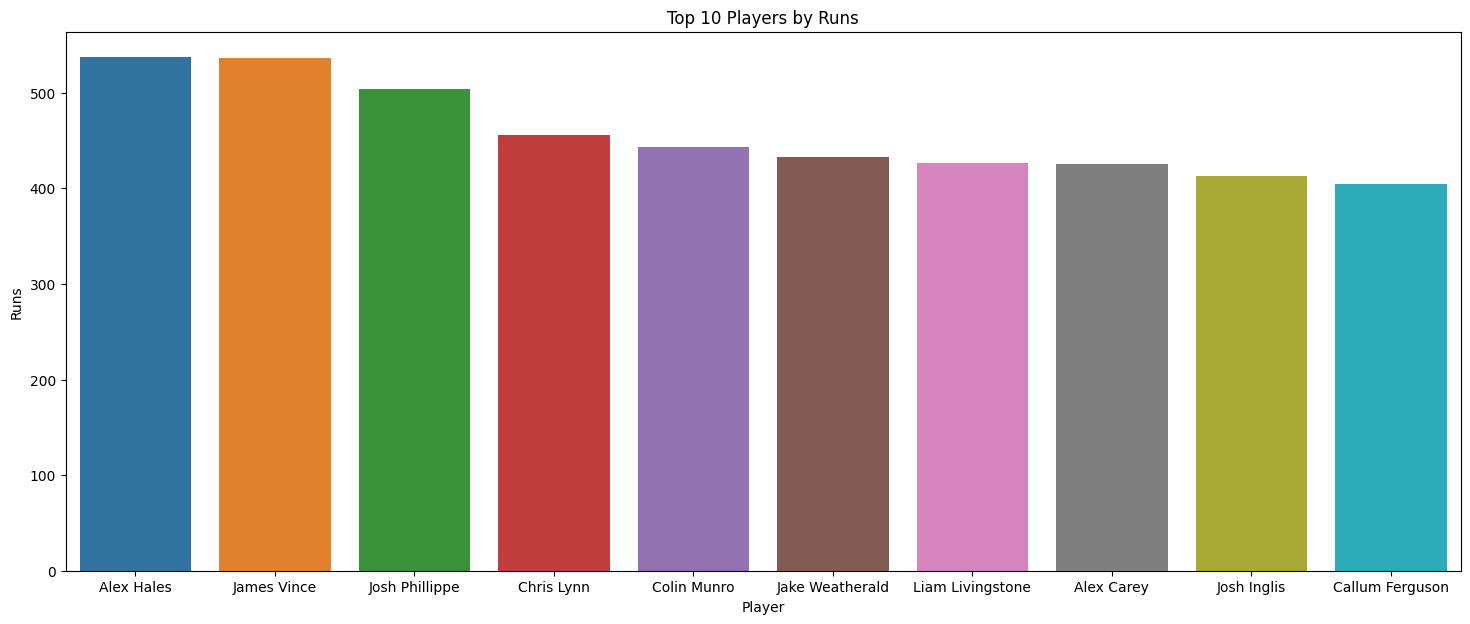

In [14]:
plt.figure(figsize=(18,7))
b1=df3.groupby('Player')['Runs'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'Runs']
sns.barplot(data= b1 , x= 'Player' , y ='Runs')
plt.title("Top 10 Players by Runs")

Text(0.5, 1.0, 'Top 10 players by Strike Rate')

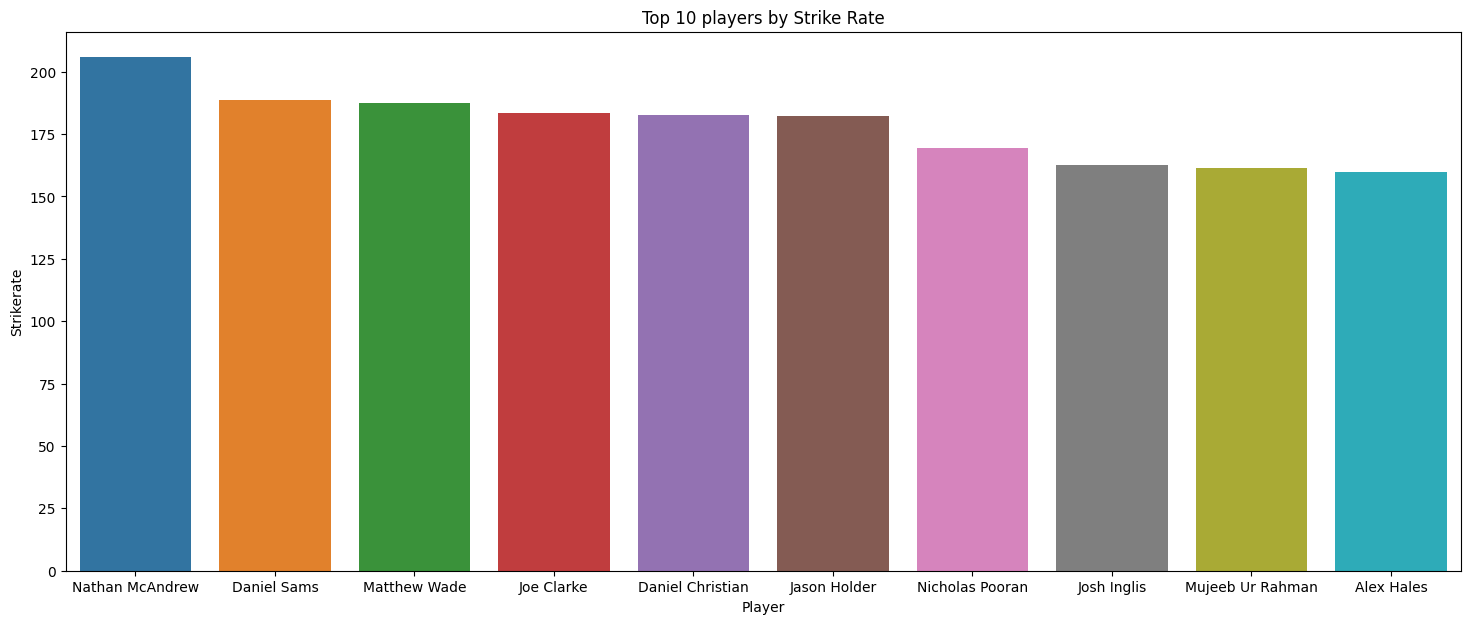

In [15]:
plt.figure(figsize=(18,7))
b1=df3.groupby('Player')['Strikerate'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'Strikerate']
sns.barplot(data= b1 , x= 'Player' , y ='Strikerate')
plt.title("Top 10 players by Strike Rate")

Text(0.5, 1.0, 'Top 10 players by Fours')

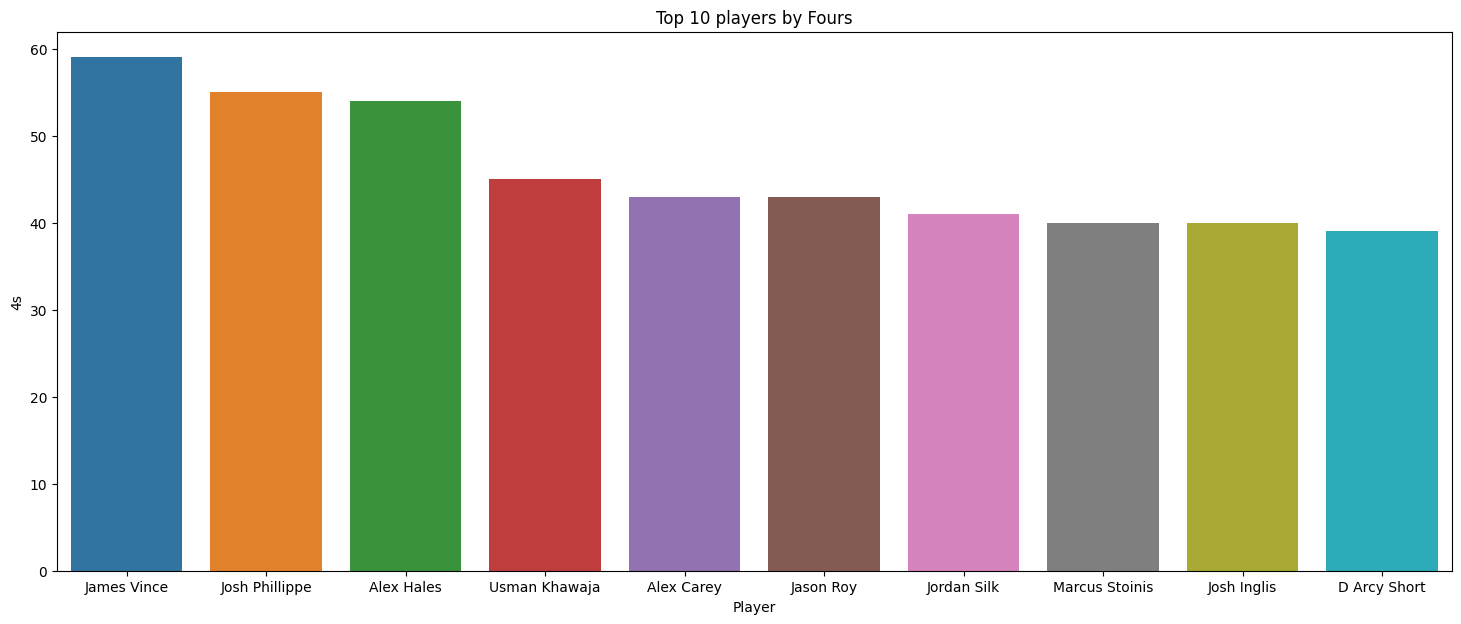

In [16]:
plt.figure(figsize=(18,7))
b1=df3.groupby('Player')['4s'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'4s']
sns.barplot(data= b1 , x= 'Player' , y ='4s')
plt.title("Top 10 players by Fours")

Text(0.5, 1.0, 'Top 10 players by Sixes')

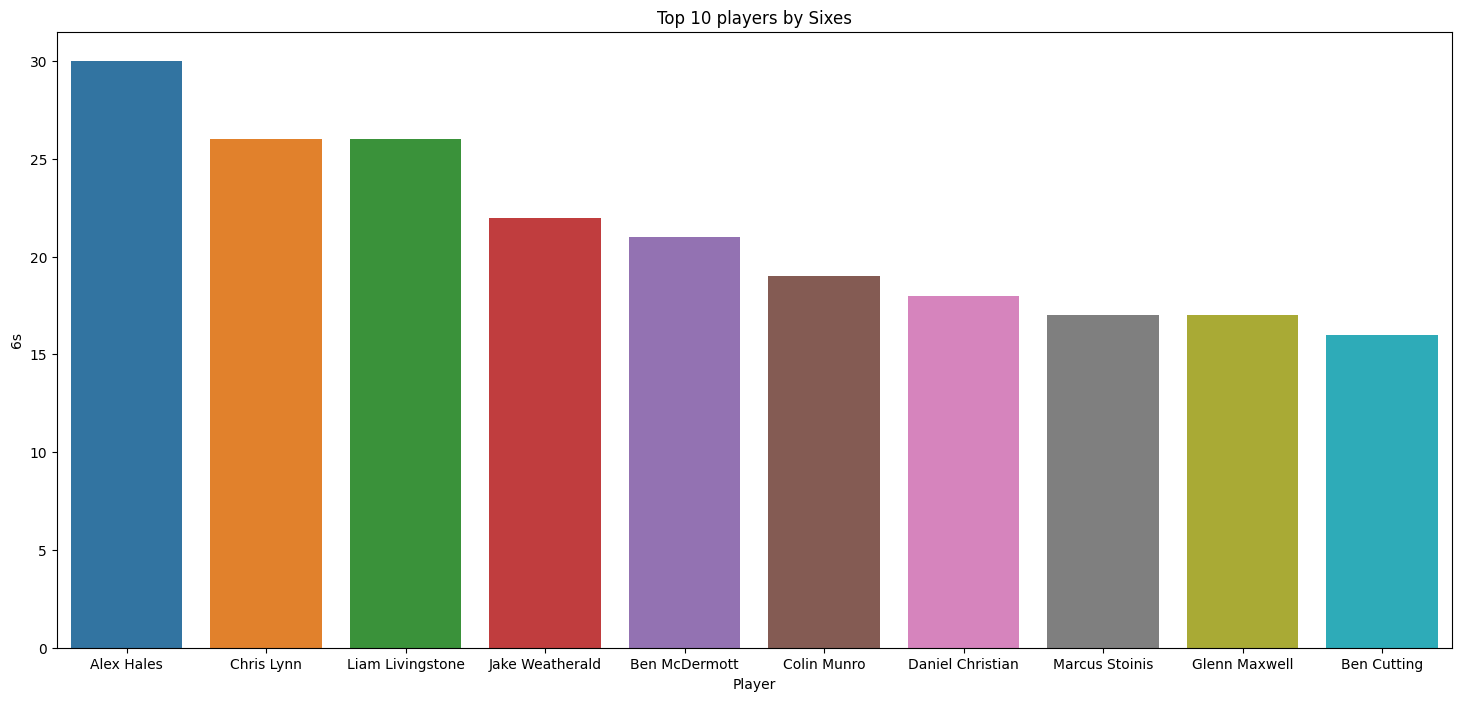

In [17]:
plt.figure(figsize=(18,8))
b1=df3.groupby('Player')['6s'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'6s']
sns.barplot(data= b1 , x= 'Player' , y ='6s')
plt.title("Top 10 players by Sixes")

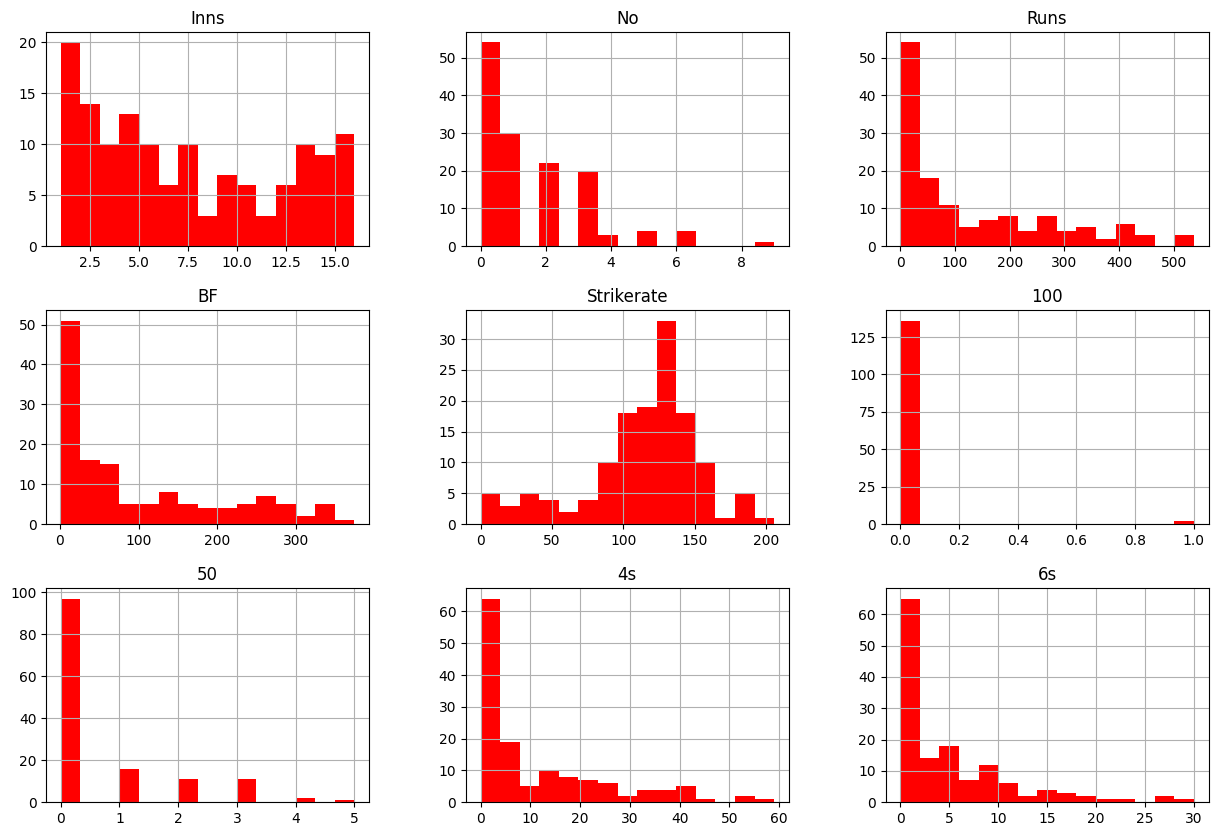

In [18]:
df3.hist(bins = 15, figsize = (15, 10), color = 'r')
plt.show()

In [19]:
df3.dtypes

Player         object
TEAM           object
Inns          float64
No            float64
Runs          float64
Hs             object
Avg            object
BF            float64
Strikerate    float64
100             int64
50              int64
4s              int64
6s              int64
dtype: object

In [20]:
df3['Hs'] = df3['Hs'].str.replace('*', '').astype(int)
df3.head()

Player             TEAM  Inns   No   Runs   Hs              Avg  \
0      Alex Hales   Sydney Thunder  15.0  1.0  537.0  110  38.357142857143   
1     James Vince    Sydney Sixers  16.0  2.0  536.0   98  38.285714285714   
2  Josh Phillippe    Sydney Sixers  16.0  0.0  504.0   95             31.5   
3      Chris Lynn    Brisbane Heat  13.0  0.0  456.0   69  35.076923076923   
4     Colin Munro  Perth Scorchers  15.0  1.0  443.0   82  31.642857142857   

      BF  Strikerate  100  50  4s  6s  
0  336.0  159.821429    1   3  54  30  
1  374.0  143.315508    0   4  59  11  
2  340.0  148.235294    0   3  55  14  
3  296.0  154.054054    0   5  39  26  
4  346.0  128.034682    0   4  32  19

In [21]:
df3['Avg'] = df3['Avg'].astype(str)
mask = df3['Avg'] == '#DIV/0!'
# print(mask)
for index, row in df3.loc[mask].iterrows():
    inns_minus_no = row['Inns'] - row['No']
    if inns_minus_no != 0:
        df3.at[index, 'Avg'] = row['Runs'] / inns_minus_no
    else:
        df3.at[index, 'Avg'] = row['Runs']

df3['Avg'] = df3['Avg'].astype(float)   


In [22]:
df3['Avg'] = df3['Avg'].round(2)

In [23]:
df3['Strikerate'] = df3['Strikerate'].round(2)

In [24]:
df3.head()

Player             TEAM  Inns   No   Runs   Hs    Avg     BF  \
0      Alex Hales   Sydney Thunder  15.0  1.0  537.0  110  38.36  336.0   
1     James Vince    Sydney Sixers  16.0  2.0  536.0   98  38.29  374.0   
2  Josh Phillippe    Sydney Sixers  16.0  0.0  504.0   95  31.50  340.0   
3      Chris Lynn    Brisbane Heat  13.0  0.0  456.0   69  35.08  296.0   
4     Colin Munro  Perth Scorchers  15.0  1.0  443.0   82  31.64  346.0   

   Strikerate  100  50  4s  6s  
0      159.82    1   3  54  30  
1      143.32    0   4  59  11  
2      148.24    0   3  55  14  
3      154.05    0   5  39  26  
4      128.03    0   4  32  19

[Text(0.5, 1.0, 'Distribution of Balls faced')]

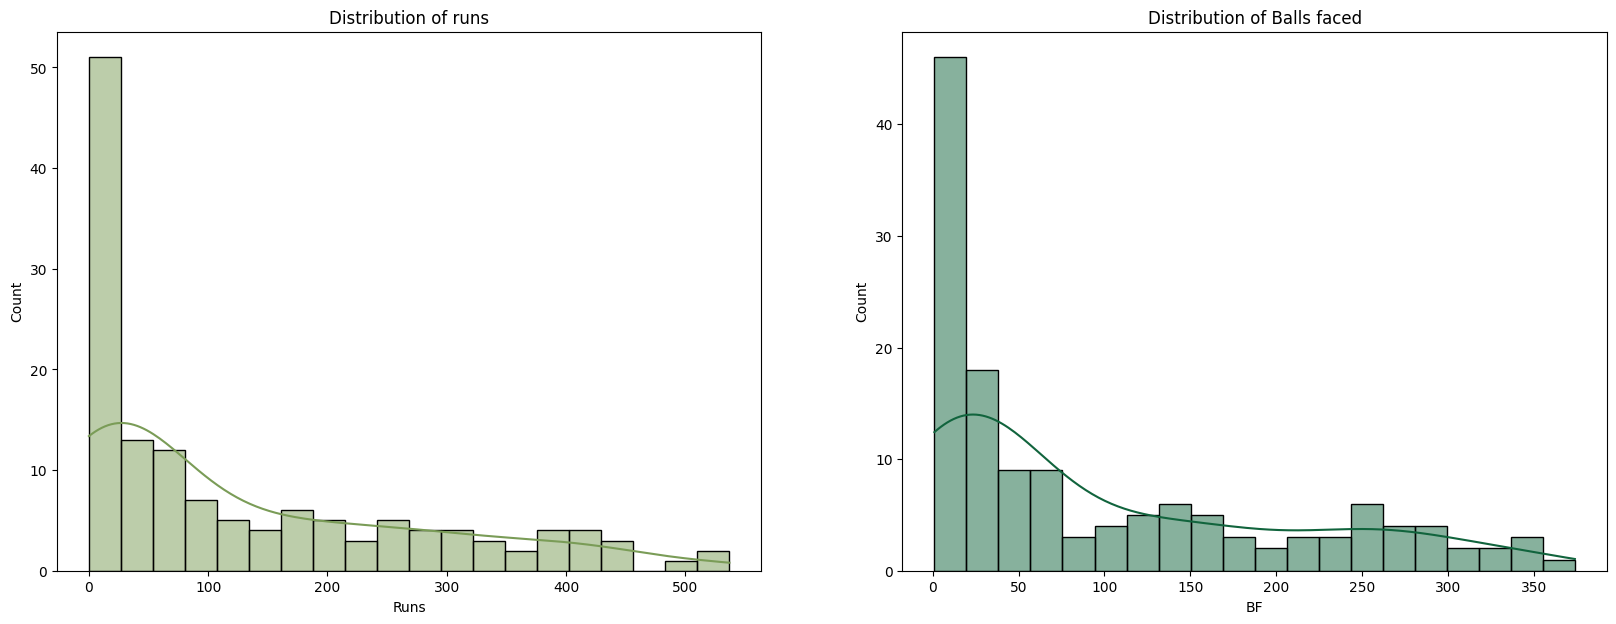

In [25]:
fig, axes = plt.subplots(1,2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df3["Runs"],
             bins = 20,    
             kde = True,
             cbar = True,
             color = "#7A9C57").set(title = "Distribution of runs")

sns.histplot(ax = axes[1], x = df3["BF"],
             bins = 20,
             kde = True,
             cbar = True,
             color = "#11643D").set(title = "Distribution of Balls faced")


[Text(0.5, 1.0, 'Distribution of sixes')]

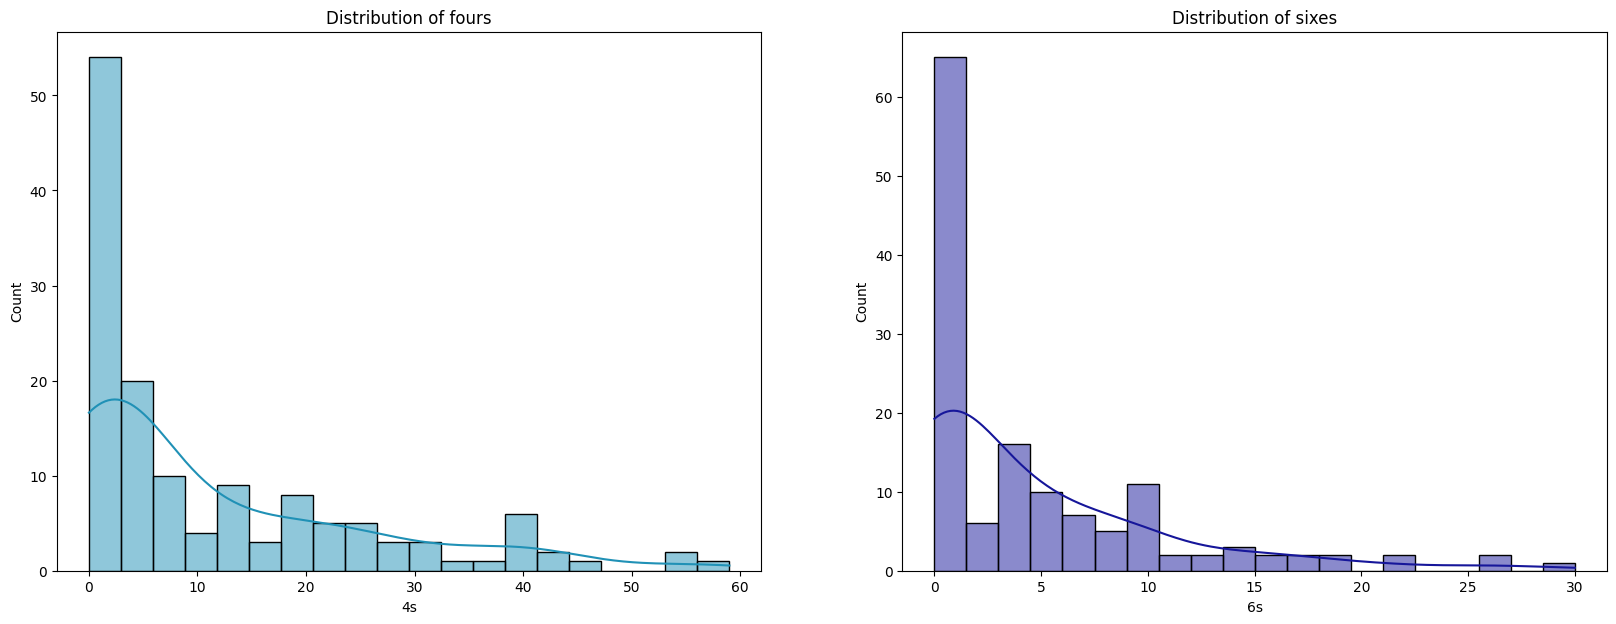

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

sns.histplot(ax = axes[0], x = df3["4s"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#2091B6").set(title = "Distribution of fours")

sns.histplot(ax = axes[1], x = df3["6s"],
             bins = 20,
             kde = True,   
             cbar = True,
             color = "#16169A").set(title = "Distribution of sixes")

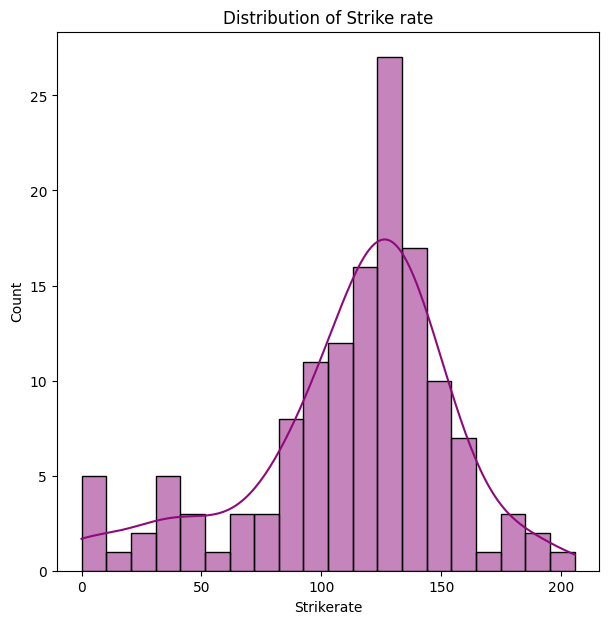

In [27]:
plt.figure(figsize=(7, 7))  

sns.histplot(df3["Strikerate"],
             bins=20,
             kde=True,   
             cbar=True,
             color="#8E0A7A")

plt.title("Distribution of Strike rate")
plt.show()


In [28]:
def remove_outliers_iqr(df1):
    Q1 = df1.quantile(0.25)
    Q3 = df1.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df1[~((df1 < lower_bound) | (df1 > upper_bound)).any(axis=1)]


df= remove_outliers_iqr(df3)

In [29]:
selected_columns = ['Player', 'Inns', 'Runs', 'Avg','Strikerate', '4s','6s']

pre_processed_data_ipl_bat = df3[selected_columns]
pre_processed_data_ipl_bat = pre_processed_data_ipl_bat.to_csv('/Users/rahuljogi/Desktop/@S4/ML/Project__/Datasets/BBL/pre_processed_data_bbl_bat.csv', index=False)


## Correlation

<AxesSubplot: >

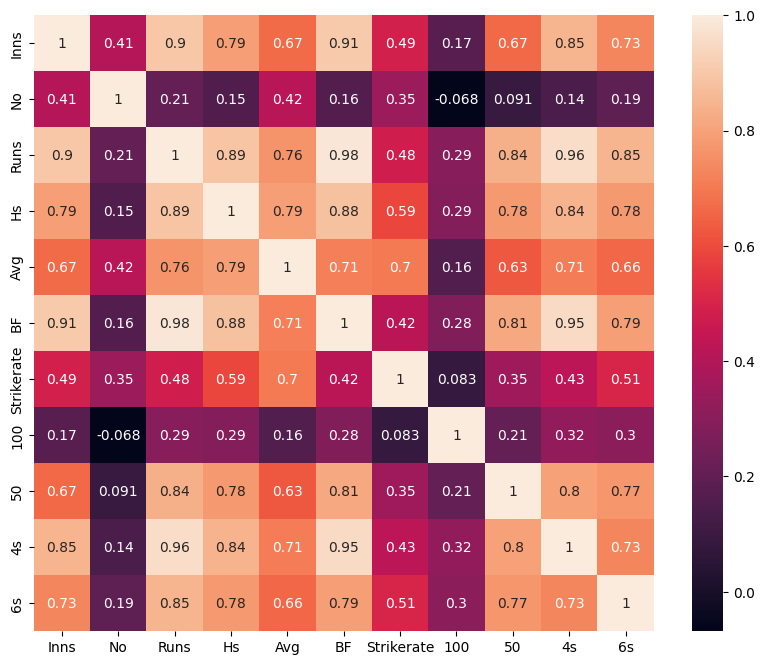

In [30]:
plt.figure(figsize=(10,8))
corr=df3.drop(columns='Player').corr()
sns.heatmap(corr,annot=True)

## K-MEANS Implementation

In [31]:
df3.head()

Player             TEAM  Inns   No   Runs   Hs    Avg     BF  \
0      Alex Hales   Sydney Thunder  15.0  1.0  537.0  110  38.36  336.0   
1     James Vince    Sydney Sixers  16.0  2.0  536.0   98  38.29  374.0   
2  Josh Phillippe    Sydney Sixers  16.0  0.0  504.0   95  31.50  340.0   
3      Chris Lynn    Brisbane Heat  13.0  0.0  456.0   69  35.08  296.0   
4     Colin Munro  Perth Scorchers  15.0  1.0  443.0   82  31.64  346.0   

   Strikerate  100  50  4s  6s  
0      159.82    1   3  54  30  
1      143.32    0   4  59  11  
2      148.24    0   3  55  14  
3      154.05    0   5  39  26  
4      128.03    0   4  32  19

In [32]:
from sklearn.preprocessing import StandardScaler

cc = df3.iloc[:,[4,5,7,8,11,12]]
scaler = StandardScaler()
scaled_data = scaler.fit(cc)
#cc = cc.apply(zscore)
cc.head()

Runs   Hs     BF  Strikerate  4s  6s
0  537.0  110  336.0      159.82  54  30
1  536.0   98  374.0      143.32  59  11
2  504.0   95  340.0      148.24  55  14
3  456.0   69  296.0      154.05  39  26
4  443.0   82  346.0      128.03  32  19

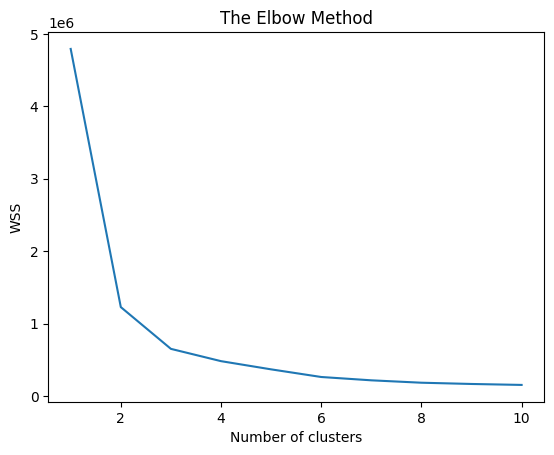

In [33]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(cc)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
silhouette_score(cc,labels)

best_scores_bat.append(("Kmeans", silhouette_score(cc,labels)))

In [35]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc)
    score = silhouette_score(cc,kmeans.labels_)
    silhouette_coefficients.append(score)

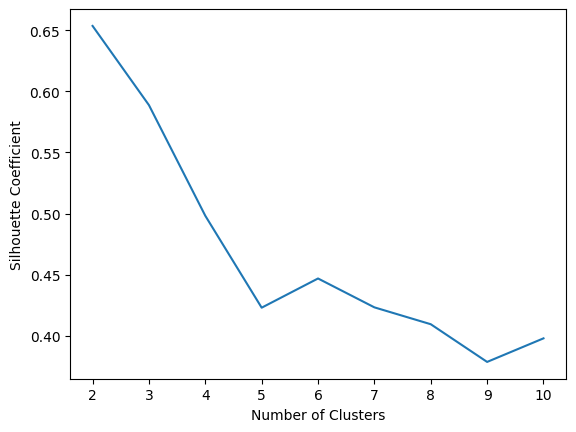

In [36]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [37]:
df3['cluster']=labels
df3.head()

Player             TEAM  Inns   No   Runs   Hs    Avg     BF  \
0      Alex Hales   Sydney Thunder  15.0  1.0  537.0  110  38.36  336.0   
1     James Vince    Sydney Sixers  16.0  2.0  536.0   98  38.29  374.0   
2  Josh Phillippe    Sydney Sixers  16.0  0.0  504.0   95  31.50  340.0   
3      Chris Lynn    Brisbane Heat  13.0  0.0  456.0   69  35.08  296.0   
4     Colin Munro  Perth Scorchers  15.0  1.0  443.0   82  31.64  346.0   

   Strikerate  100  50  4s  6s  cluster  
0      159.82    1   3  54  30        1  
1      143.32    0   4  59  11        1  
2      148.24    0   3  55  14        1  
3      154.05    0   5  39  26        1  
4      128.03    0   4  32  19        1

In [38]:
df3.cluster.value_counts().sort_index()

0    99
1    39
Name: cluster, dtype: int64

In [39]:
df3.head(10)

Player               TEAM  Inns   No   Runs   Hs    Avg     BF  \
0        Alex Hales     Sydney Thunder  15.0  1.0  537.0  110  38.36  336.0   
1       James Vince      Sydney Sixers  16.0  2.0  536.0   98  38.29  374.0   
2    Josh Phillippe      Sydney Sixers  16.0  0.0  504.0   95  31.50  340.0   
3        Chris Lynn      Brisbane Heat  13.0  0.0  456.0   69  35.08  296.0   
4       Colin Munro    Perth Scorchers  15.0  1.0  443.0   82  31.64  346.0   
5   Jake Weatherald  Adelaide Strikers  15.0  3.0  433.0   80  36.08  307.0   
6  Liam Livingstone    Perth Scorchers  14.0  0.0  426.0   77  30.43  318.0   
7        Alex Carey  Adelaide Strikers  13.0  0.0  425.0  101  32.69  348.0   
8       Josh Inglis    Perth Scorchers  16.0  4.0  413.0   72  79.00  254.0   
9   Callum Ferguson     Sydney Thunder  15.0  2.0  405.0   61  31.15  327.0   

   Strikerate  100  50  4s  6s  cluster  
0      159.82    1   3  54  30        1  
1      143.32    0   4  59  11        1  
2      148.24    0   3  55  14        1  
3      154.05    0   5  39  26        1  
4      128.03    0   4  32  19        1  
5      141.04    0   3  37  22        1  
6      133.96    0   3  26  26        1  
7      122.13    1   2  43  10        1  
8      162.60    0   3  40   9        1  
9      123.85    0   3  39   6        1

In [40]:
df3['cluster'] = df3['cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [41]:
Grade_A = df3[df3['cluster'] == 'Grade A']
Grade_A.head(5)

Player             TEAM  Inns   No   Runs   Hs    Avg     BF  \
0      Alex Hales   Sydney Thunder  15.0  1.0  537.0  110  38.36  336.0   
1     James Vince    Sydney Sixers  16.0  2.0  536.0   98  38.29  374.0   
2  Josh Phillippe    Sydney Sixers  16.0  0.0  504.0   95  31.50  340.0   
3      Chris Lynn    Brisbane Heat  13.0  0.0  456.0   69  35.08  296.0   
4     Colin Munro  Perth Scorchers  15.0  1.0  443.0   82  31.64  346.0   

   Strikerate  100  50  4s  6s  cluster  
0      159.82    1   3  54  30  Grade A  
1      143.32    0   4  59  11  Grade A  
2      148.24    0   3  55  14  Grade A  
3      154.05    0   5  39  26  Grade A  
4      128.03    0   4  32  19  Grade A

In [42]:
Grade_B = df3[df3['cluster'] == 'Grade B']
Grade_B.head()

Player                 TEAM  Inns   No   Runs  Hs    Avg  \
38         Daniel Sams       Sydney Thunder   8.0  3.0  200.0  65  40.00   
40        Sam Heazlett        Brisbane Heat   9.0  1.0  180.0  74  22.50   
41           Joe Burns        Brisbane Heat  11.0  3.0  180.0  52  22.50   
42         Aaron Finch  Melbourne Renegades  13.0  0.0  179.0  39  13.77   
43  Marnus Labuschagne        Brisbane Heat   6.0  0.0  176.0  49  29.33   

       BF  Strikerate  100  50  4s  6s  cluster  
38  106.0      188.68    0   2  11  14  Grade B  
40  133.0      135.34    0   1  14   9  Grade B  
41  144.0      125.00    0   1  18   5  Grade B  
42  158.0      113.29    0   0  20   3  Grade B  
43  143.0      123.08    0   0  13   3  Grade B

##  HIERARCHICAL CLUSTERING

In [43]:
df3 = df3.drop(columns=['cluster'], axis=1)

In [44]:
df3.head()

Player             TEAM  Inns   No   Runs   Hs    Avg     BF  \
0      Alex Hales   Sydney Thunder  15.0  1.0  537.0  110  38.36  336.0   
1     James Vince    Sydney Sixers  16.0  2.0  536.0   98  38.29  374.0   
2  Josh Phillippe    Sydney Sixers  16.0  0.0  504.0   95  31.50  340.0   
3      Chris Lynn    Brisbane Heat  13.0  0.0  456.0   69  35.08  296.0   
4     Colin Munro  Perth Scorchers  15.0  1.0  443.0   82  31.64  346.0   

   Strikerate  100  50  4s  6s  
0      159.82    1   3  54  30  
1      143.32    0   4  59  11  
2      148.24    0   3  55  14  
3      154.05    0   5  39  26  
4      128.03    0   4  32  19

In [45]:
from sklearn.preprocessing import StandardScaler
cc = df3.iloc[:,[4,11,12,9,10]]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cc)

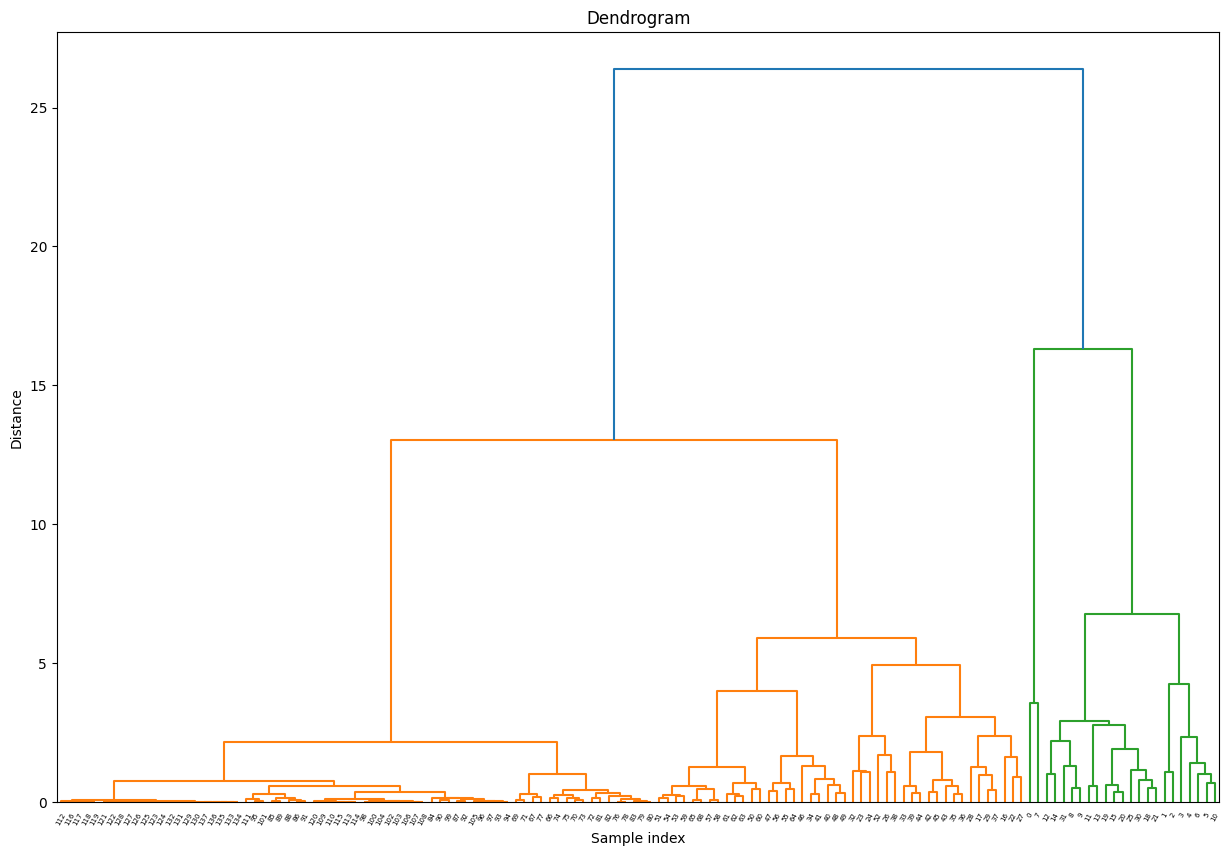

In [46]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(scaled_data, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.xticks(rotation=60)
plt.show()

In [47]:
from sklearn.cluster import AgglomerativeClustering


num_clusters = 2

model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
clusters = model.fit_predict(scaled_data)

silhouette_avg = silhouette_score(scaled_data, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

best_scores_bat.append(("HIERARCHICAL",silhouette_avg))

Silhouette Score: 0.65


In [48]:
df3['Cluster'] = clusters
print(df3.head())


           Player             TEAM  Inns   No   Runs   Hs    Avg     BF  \
0      Alex Hales   Sydney Thunder  15.0  1.0  537.0  110  38.36  336.0   
1     James Vince    Sydney Sixers  16.0  2.0  536.0   98  38.29  374.0   
2  Josh Phillippe    Sydney Sixers  16.0  0.0  504.0   95  31.50  340.0   
3      Chris Lynn    Brisbane Heat  13.0  0.0  456.0   69  35.08  296.0   
4     Colin Munro  Perth Scorchers  15.0  1.0  443.0   82  31.64  346.0   

   Strikerate  100  50  4s  6s  Cluster  
0      159.82    1   3  54  30        0  
1      143.32    0   4  59  11        0  
2      148.24    0   3  55  14        0  
3      154.05    0   5  39  26        0  
4      128.03    0   4  32  19        0  


In [49]:
df3['Cluster'] = df3['Cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [50]:
Grade_A = df3[df3['Cluster'] == 'Grade A']
Grade_A.head(10)

Player               TEAM  Inns   No   Runs   Hs    Avg     BF  \
0        Alex Hales     Sydney Thunder  15.0  1.0  537.0  110  38.36  336.0   
1       James Vince      Sydney Sixers  16.0  2.0  536.0   98  38.29  374.0   
2    Josh Phillippe      Sydney Sixers  16.0  0.0  504.0   95  31.50  340.0   
3        Chris Lynn      Brisbane Heat  13.0  0.0  456.0   69  35.08  296.0   
4       Colin Munro    Perth Scorchers  15.0  1.0  443.0   82  31.64  346.0   
5   Jake Weatherald  Adelaide Strikers  15.0  3.0  433.0   80  36.08  307.0   
6  Liam Livingstone    Perth Scorchers  14.0  0.0  426.0   77  30.43  318.0   
7        Alex Carey  Adelaide Strikers  13.0  0.0  425.0  101  32.69  348.0   
8       Josh Inglis    Perth Scorchers  16.0  4.0  413.0   72  79.00  254.0   
9   Callum Ferguson     Sydney Thunder  15.0  2.0  405.0   61  31.15  327.0   

   Strikerate  100  50  4s  6s  Cluster  
0      159.82    1   3  54  30  Grade A  
1      143.32    0   4  59  11  Grade A  
2      148.24    0   3  55  14  Grade A  
3      154.05    0   5  39  26  Grade A  
4      128.03    0   4  32  19  Grade A  
5      141.04    0   3  37  22  Grade A  
6      133.96    0   3  26  26  Grade A  
7      122.13    1   2  43  10  Grade A  
8      162.60    0   3  40   9  Grade A  
9      123.85    0   3  39   6  Grade A

In [51]:
Grade_B = df3[df3['Cluster'] == 'Grade B']
Grade_B.head()

Player               TEAM  Inns   No   Runs  Hs    Avg     BF  \
16  Usman Khawaja     Sydney Thunder  15.0  0.0  338.0  49  22.53  265.0   
17  Jimmy Peirson      Brisbane Heat  16.0  9.0  334.0  69  47.71  256.0   
22     Max Bryant      Brisbane Heat  14.0  0.0  302.0  40  21.57  237.0   
23    Ben Cutting     Sydney Thunder  13.0  6.0  280.0  33  40.00  179.0   
24      Tim David  Hobart Hurricanes  14.0  5.0  277.0  58  30.78  182.0   

    Strikerate  100  50  4s  6s  Cluster  
16      127.55    0   0  45   3  Grade B  
17      130.47    0   1  19   7  Grade B  
22      127.43    0   0  34   8  Grade B  
23      156.42    0   0  26  16  Grade B  
24      152.20    0   1  19  14  Grade B

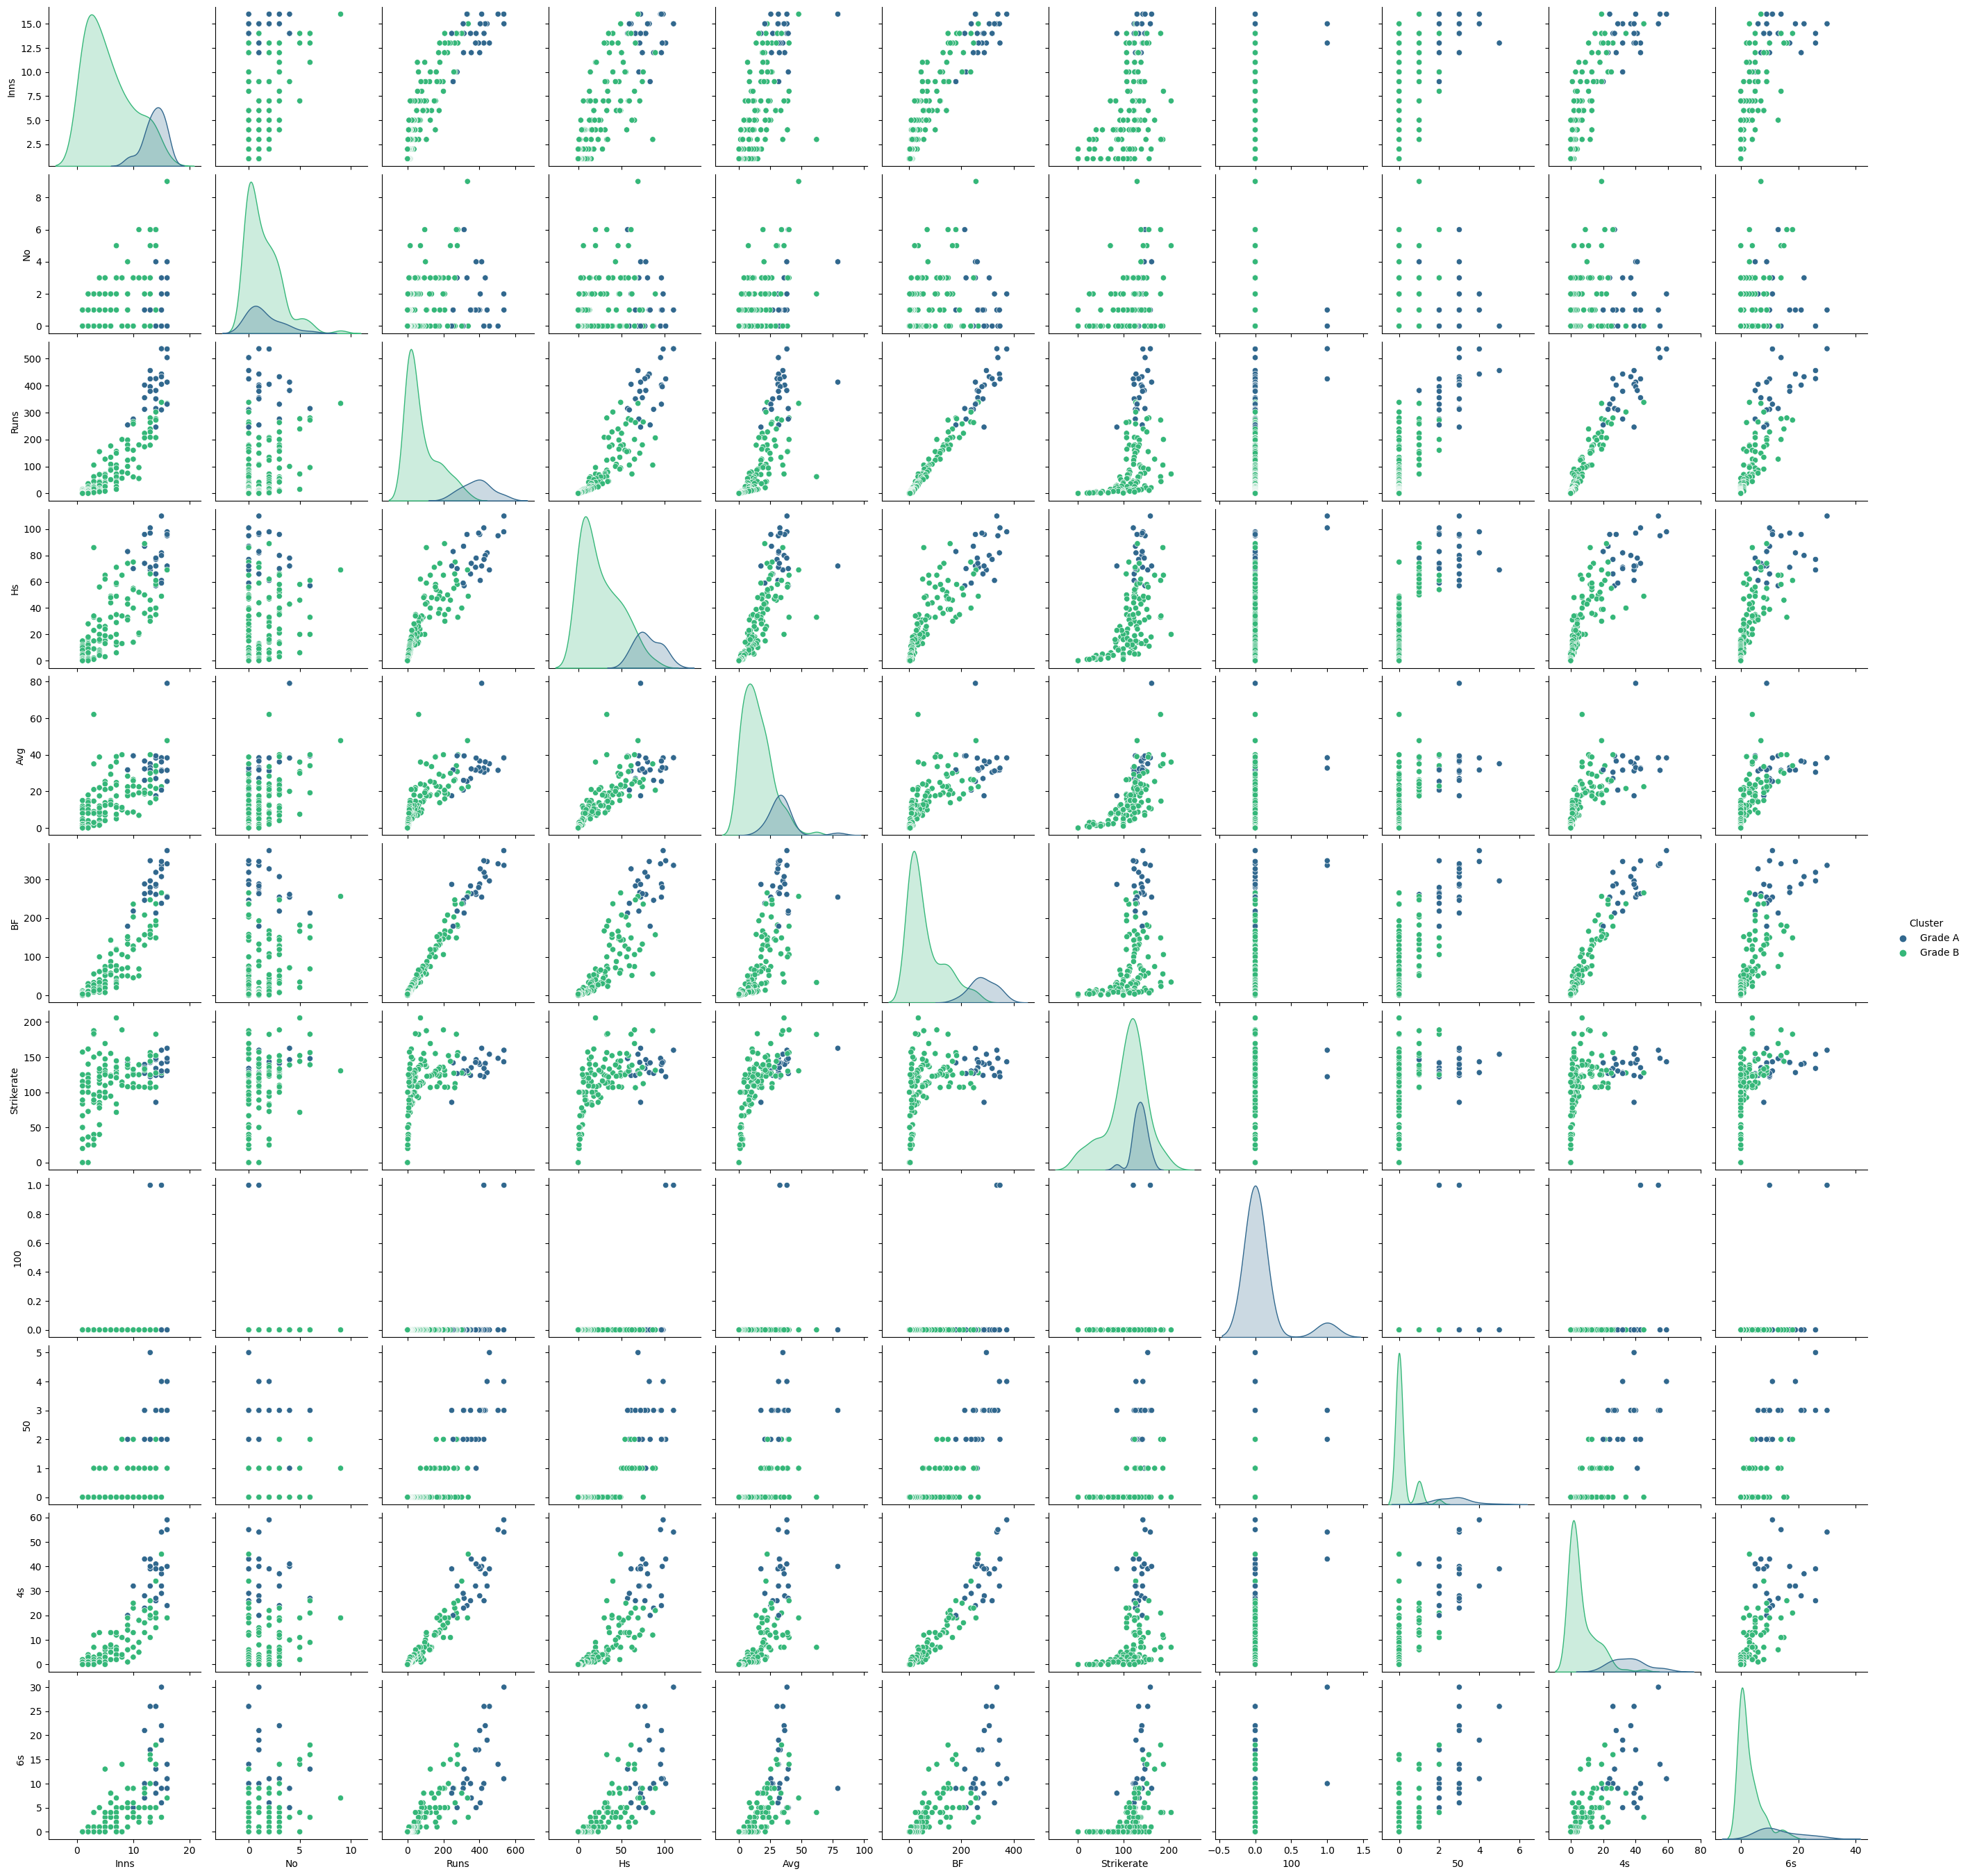

In [52]:
sns.pairplot(df3, hue='Cluster', palette='viridis')
plt.show()

# BOWLING DATA

In [53]:
df4 = pd.read_csv('/Users/rahuljogi/Desktop/@S4/ML/Project__/Datasets/BBL/Bigbash_Bowl.csv')
df4.head()

PLAYER               TEAM  INNINGS  OVERS  OVERS*  RUNS  WICKETS  \
0  Jhye Richardson    Perth Scorchers       17   61.3  61.500   463       29   
1    Ben Dwarshuis      Sydney Sixers       13   45.3  45.500   403       24   
2    Mark Steketee      Brisbane Heat       16   56.2  56.333   522       24   
3         Wes Agar  Adelaide Strikers       15   54.4  54.667   457       22   
4   Tanveer Sangha     Sydney Thunder       15   47.3  47.500   394       21   

    BBI          AVERAGE      ECON               SR  4W  5W  
0  4\24  15.965517241379  7.528455  12.724137931034   2   0  
1  4\13  16.791666666667  8.857143           11.375   1   0  
2  4\33            21.75  9.266327         14.08325   1   0  
3  4\27  20.772727272727  8.359705  14.909181818182   1   0  
4  4\14  18.761904761905  8.294737  13.571428571429   1   0

In [54]:
df4.rename(columns={
    'PLAYER': 'Player',
    'INNINGS': 'Inns',
    'OVERS': 'Overs',
    'OVERS*':'OVERST',
    'RUNS': 'Runs',
    'WICKETS': 'Wickets',
    'AVERAGE': 'Avg',
    'ECON': 'Economy',
    'SR': 'Strikerate',
    'BBI':'Best_Bowilng',
    "4W": '4s',
    "5W": '6s'
}, inplace=True)

df4.head()

Player               TEAM  Inns  Overs  OVERST  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3  61.500   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3  45.500   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2  56.333   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4  54.667   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3  47.500   394       21   

  Best_Bowilng              Avg   Economy       Strikerate  4s  6s  
0         4\24  15.965517241379  7.528455  12.724137931034   2   0  
1         4\13  16.791666666667  8.857143           11.375   1   0  
2         4\33            21.75  9.266327         14.08325   1   0  
3         4\27  20.772727272727  8.359705  14.909181818182   1   0  
4         4\14  18.761904761905  8.294737  13.571428571429   1   0

In [55]:
df4 = df4.drop(columns=['OVERST'],axis=1)

In [56]:
df4.head()

Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   

  Best_Bowilng              Avg   Economy       Strikerate  4s  6s  
0         4\24  15.965517241379  7.528455  12.724137931034   2   0  
1         4\13  16.791666666667  8.857143           11.375   1   0  
2         4\33            21.75  9.266327         14.08325   1   0  
3         4\27  20.772727272727  8.359705  14.909181818182   1   0  
4         4\14  18.761904761905  8.294737  13.571428571429   1   0

In [57]:
df4.dtypes

Player           object
TEAM             object
Inns              int64
Overs           float64
Runs              int64
Wickets           int64
Best_Bowilng     object
Avg              object
Economy         float64
Strikerate       object
4s                int64
6s                int64
dtype: object

In [58]:
df4['Avg'] = df4['Avg'].astype(str)
mask = df4['Avg'] == '#DIV/0!'
# print(mask)
for index, row in df4.loc[mask].iterrows():
    wkt = row['Wickets']
    if wkt != 0:
        df4.at[index, 'Avg'] = row['Runs'] / wkt
    else:
        df4.at[index, 'Avg'] = row['Runs']

df4['Avg'] = df4['Avg'].astype(float)   


In [59]:
df4['Strikerate'] = df4['Strikerate'].astype(str)
mask = df4['Strikerate'] == '#DIV/0!'
# print(mask)
for index, row in df4.loc[mask].iterrows():
        df4.at[index, 'Strikerate'] = row['Runs']

df4['Strikerate'] = df4['Strikerate'].astype(float)   


In [60]:
df4.tail()

Player             TEAM  Inns  Overs  Runs  Wickets Best_Bowilng  \
97   Andre Fletcher  Melbourne Stars     1    1.0     8        0          0\8   
98    Tom O Connell  Melbourne Stars     1    1.0    15        0         0\15   
99     Lance Morris  Melbourne Stars     2    3.0    37        0         0\14   
100   Ashton Turner  Perth Scorchers     5    5.3    54        0          0\8   
101      Joel Paris  Perth Scorchers     1    1.0    10        0         0\10   

      Avg    Economy  Strikerate  4s  6s  
97    8.0   8.000000         8.0   0   0  
98   15.0  15.000000        15.0   0   0  
99   37.0  12.333333        37.0   0   0  
100  54.0   9.818182        54.0   0   0  
101  10.0  10.000000        10.0   0   0

Text(0.5, 1.0, 'Top 10 Players by taking Wickets')

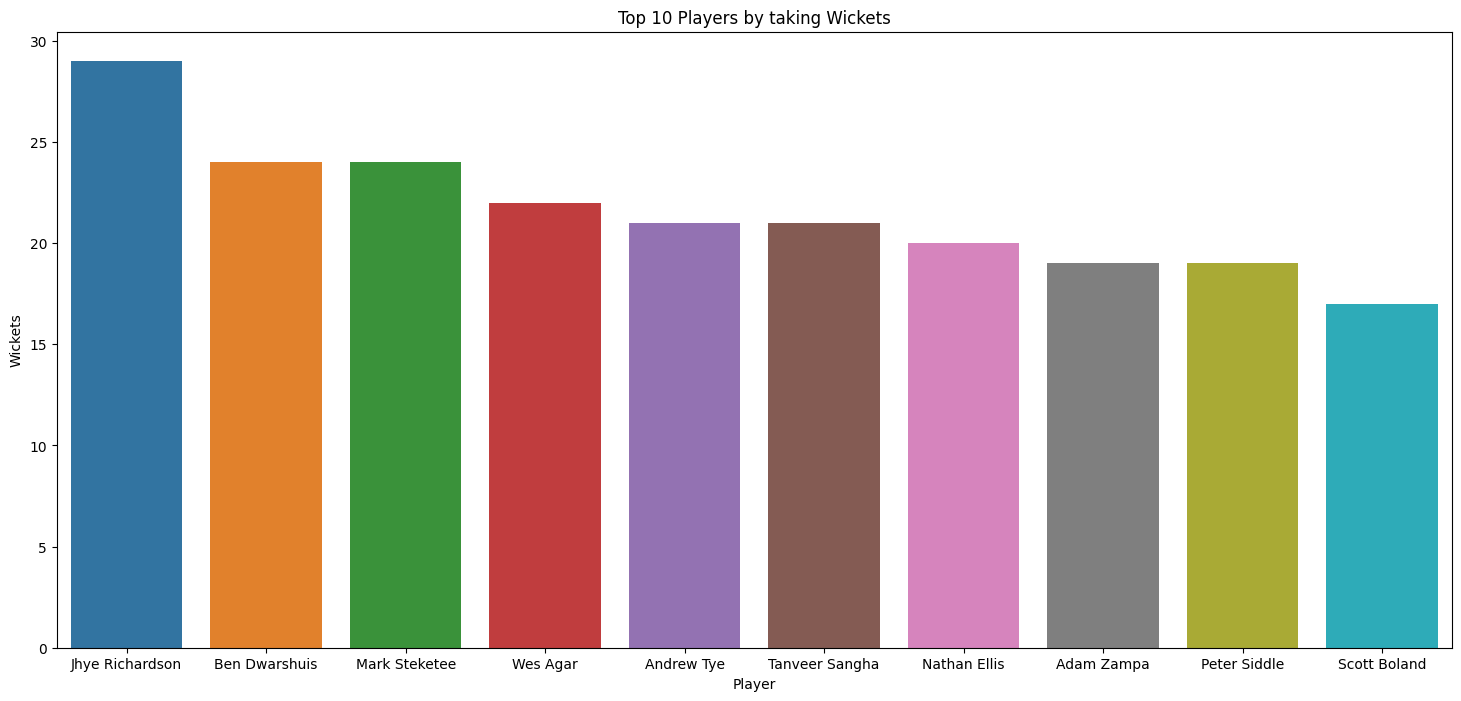

In [61]:
plt.figure(figsize=(18,8))
b1=df4.groupby('Player')['Wickets'].sum().sort_values(ascending = False ).head(10)
b1= b1.reset_index() 
b1.columns = ['Player' ,'Wickets']
sns.barplot(data= b1 , x= 'Player' , y ='Wickets')
plt.title("Top 10 Players by taking Wickets")

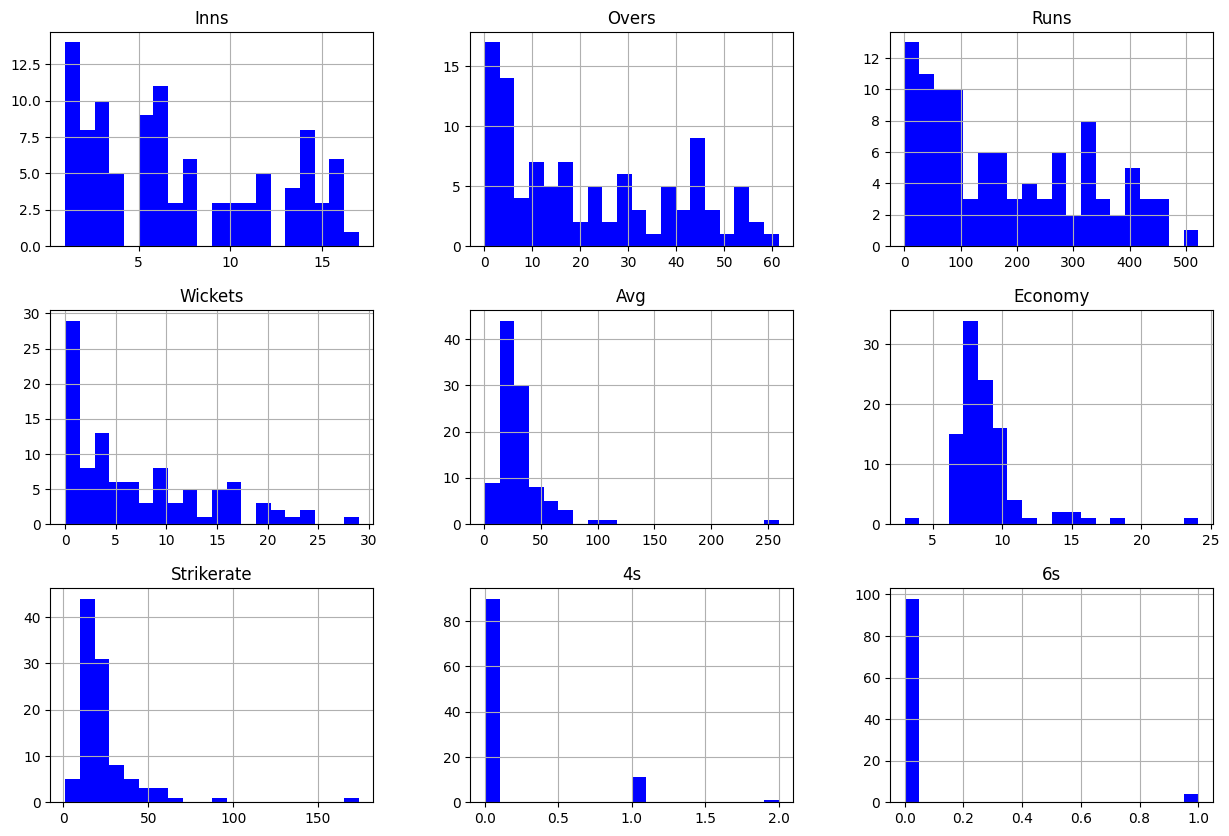

In [62]:
df4.hist(bins = 20, figsize = (15, 10), color = 'blue')
plt.show()

In [63]:
def transform_format(s):
    parts = s.split('\\')
    return int(int(parts[1]) - int(parts[0]))

In [64]:
df4['Best_Bowilng'] = df4['Best_Bowilng'].apply(transform_format)
df4.head()

Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   

   Best_Bowilng        Avg   Economy  Strikerate  4s  6s  
0            20  15.965517  7.528455   12.724138   2   0  
1             9  16.791667  8.857143   11.375000   1   0  
2            29  21.750000  9.266327   14.083250   1   0  
3            23  20.772727  8.359705   14.909182   1   0  
4            10  18.761905  8.294737   13.571429   1   0

In [65]:
df4.head()

Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   

   Best_Bowilng        Avg   Economy  Strikerate  4s  6s  
0            20  15.965517  7.528455   12.724138   2   0  
1             9  16.791667  8.857143   11.375000   1   0  
2            29  21.750000  9.266327   14.083250   1   0  
3            23  20.772727  8.359705   14.909182   1   0  
4            10  18.761905  8.294737   13.571429   1   0

In [66]:
selected_columns = ['Player', 'TEAM','Inns', 'Runs', 'Avg','Strikerate', 'Wickets','Best_Bowilng','Economy']

pre_processed_data_ipl_bat = df4[selected_columns]
pre_processed_data_ipl_bat = pre_processed_data_ipl_bat.to_csv('/Users/rahuljogi/Desktop/@S4/ML/Project__/Datasets/BBL/pre_processed_data_bbl_ball.csv', index=False)


<AxesSubplot: >

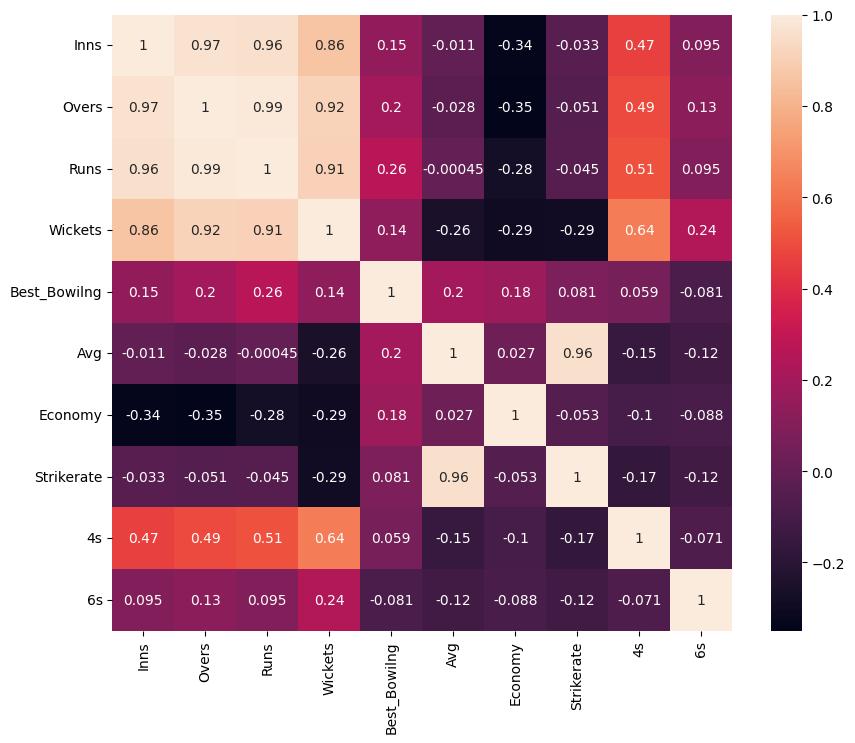

In [67]:
plt.figure(figsize=(10,8))
corr=df4.drop(columns='Player').corr()
sns.heatmap(corr,annot=True)

# K-MEANS

In [68]:
df4.head()

Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   

   Best_Bowilng        Avg   Economy  Strikerate  4s  6s  
0            20  15.965517  7.528455   12.724138   2   0  
1             9  16.791667  8.857143   11.375000   1   0  
2            29  21.750000  9.266327   14.083250   1   0  
3            23  20.772727  8.359705   14.909182   1   0  
4            10  18.761905  8.294737   13.571429   1   0

In [69]:
cc = df4.iloc[:,4:10]
# cc2 = cc.apply(zscore)
cc.head()

Runs  Wickets  Best_Bowilng        Avg   Economy  Strikerate
0   463       29            20  15.965517  7.528455   12.724138
1   403       24             9  16.791667  8.857143   11.375000
2   522       24            29  21.750000  9.266327   14.083250
3   457       22            23  20.772727  8.359705   14.909182
4   394       21            10  18.761905  8.294737   13.571429

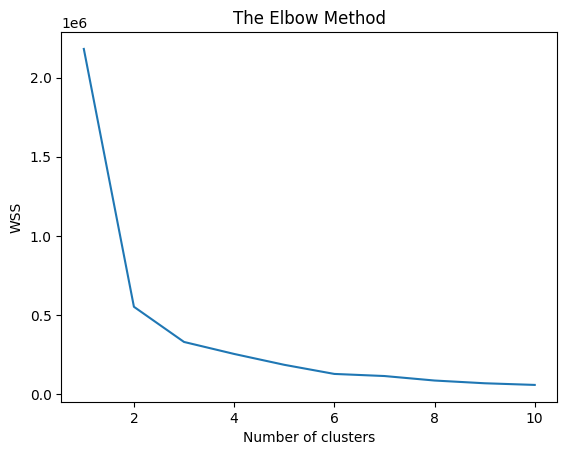

In [70]:
from sklearn.cluster import KMeans
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i,random_state=0)
    kmeans.fit(cc)
    wss.append(kmeans.inertia_)
plt.plot(range(1, 11), wss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

In [71]:
kmeans = KMeans(n_clusters=2,random_state=0)
kmeans.fit(cc)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [72]:
silhouette_score(cc,labels)

best_scores_ball.append(("Kmeans", silhouette_score(cc, labels)))


In [73]:
kmeans_kwargs = {
   "init": "random",
   "n_init": 10,
   "max_iter": 300,
   "random_state": 42,
}


silhouette_coefficients = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(cc)
    score = silhouette_score(cc,kmeans.labels_)
    silhouette_coefficients.append(score)

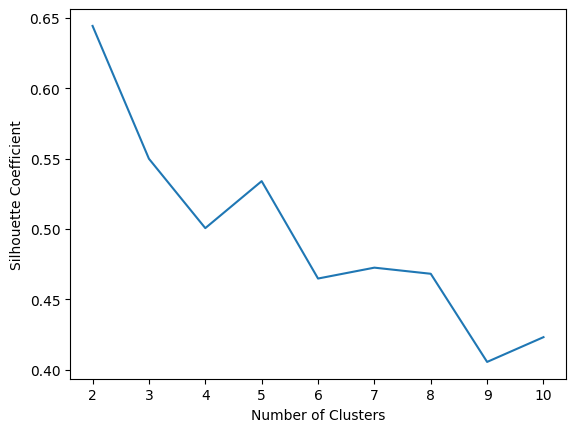

In [74]:
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()

In [75]:
df4['cluster']=labels
df4.head()

Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   

   Best_Bowilng        Avg   Economy  Strikerate  4s  6s  cluster  
0            20  15.965517  7.528455   12.724138   2   0        1  
1             9  16.791667  8.857143   11.375000   1   0        1  
2            29  21.750000  9.266327   14.083250   1   0        1  
3            23  20.772727  8.359705   14.909182   1   0        1  
4            10  18.761905  8.294737   13.571429   1   0        1

In [76]:
df4.cluster.value_counts().sort_index()

0    62
1    40
Name: cluster, dtype: int64

In [77]:
aggdata=df4.groupby('cluster').mean()
aggdata['Freq']=df4.cluster.value_counts().sort_index()
aggdata

Inns      Overs        Runs   Wickets  Best_Bowilng        Avg  \
cluster                                                                        
0         3.709677   9.620968   79.419355   2.83871     17.435484  31.011762   
1        12.550000  41.797500  337.900000  13.72500     20.700000  33.125599   

          Economy  Strikerate        4s        6s  Freq  
cluster                                                  
0        9.299950   24.196975  0.032258  0.032258    62  
1        8.142335   24.106395  0.275000  0.050000    40

In [78]:
df4['cluster'] = df4['cluster'].replace({1: 'Grade A', 0: 'Grade B'})

In [79]:
Grade_A = df4[df4['cluster'] == 'Grade A']
Grade_A.head()

Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   

   Best_Bowilng        Avg   Economy  Strikerate  4s  6s  cluster  
0            20  15.965517  7.528455   12.724138   2   0  Grade A  
1             9  16.791667  8.857143   11.375000   1   0  Grade A  
2            29  21.750000  9.266327   14.083250   1   0  Grade A  
3            23  20.772727  8.359705   14.909182   1   0  Grade A  
4            10  18.761905  8.294737   13.571429   1   0  Grade A

In [80]:
Grade_B = df4[df4['cluster'] == 'Grade B']
Grade_B.head()

Player                 TEAM  Inns  Overs  Runs  Wickets  \
20     Mujeeb Ur Rahman        Brisbane Heat     8   30.0   188       14   
26  Nathan Coulter-Nile      Melbourne Stars     6   21.5   172       11   
29            Zak Evans  Melbourne Renegades     5   15.0   146       10   
30   Marnus Labuschagne        Brisbane Heat     6   17.0   146       10   
34      Brendan Doggett       Sydney Thunder     5   18.1   120        9   

    Best_Bowilng        Avg   Economy  Strikerate  4s  6s  cluster  
20            10  13.428571  6.266667   12.857143   0   1  Grade B  
26             6  15.636364  7.877983   11.908909   1   0  Grade B  
29            28  14.600000  9.733333    9.000000   0   1  Grade B  
30            10  14.600000  8.588235   10.200000   0   0  Grade B  
34            18  13.333333  6.629834   12.066667   1   0  Grade B

# Hierarchical

In [81]:
df4.head()

Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   

   Best_Bowilng        Avg   Economy  Strikerate  4s  6s  cluster  
0            20  15.965517  7.528455   12.724138   2   0  Grade A  
1             9  16.791667  8.857143   11.375000   1   0  Grade A  
2            29  21.750000  9.266327   14.083250   1   0  Grade A  
3            23  20.772727  8.359705   14.909182   1   0  Grade A  
4            10  18.761905  8.294737   13.571429   1   0  Grade A

In [82]:
df4 = df4.drop(columns=['cluster'])
df4.head()


Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   

   Best_Bowilng        Avg   Economy  Strikerate  4s  6s  
0            20  15.965517  7.528455   12.724138   2   0  
1             9  16.791667  8.857143   11.375000   1   0  
2            29  21.750000  9.266327   14.083250   1   0  
3            23  20.772727  8.359705   14.909182   1   0  
4            10  18.761905  8.294737   13.571429   1   0

In [83]:
from sklearn.preprocessing import StandardScaler
cc = df4.iloc[:,4:10]
scaler = StandardScaler()
scaled_data = scaler.fit_transform(cc)

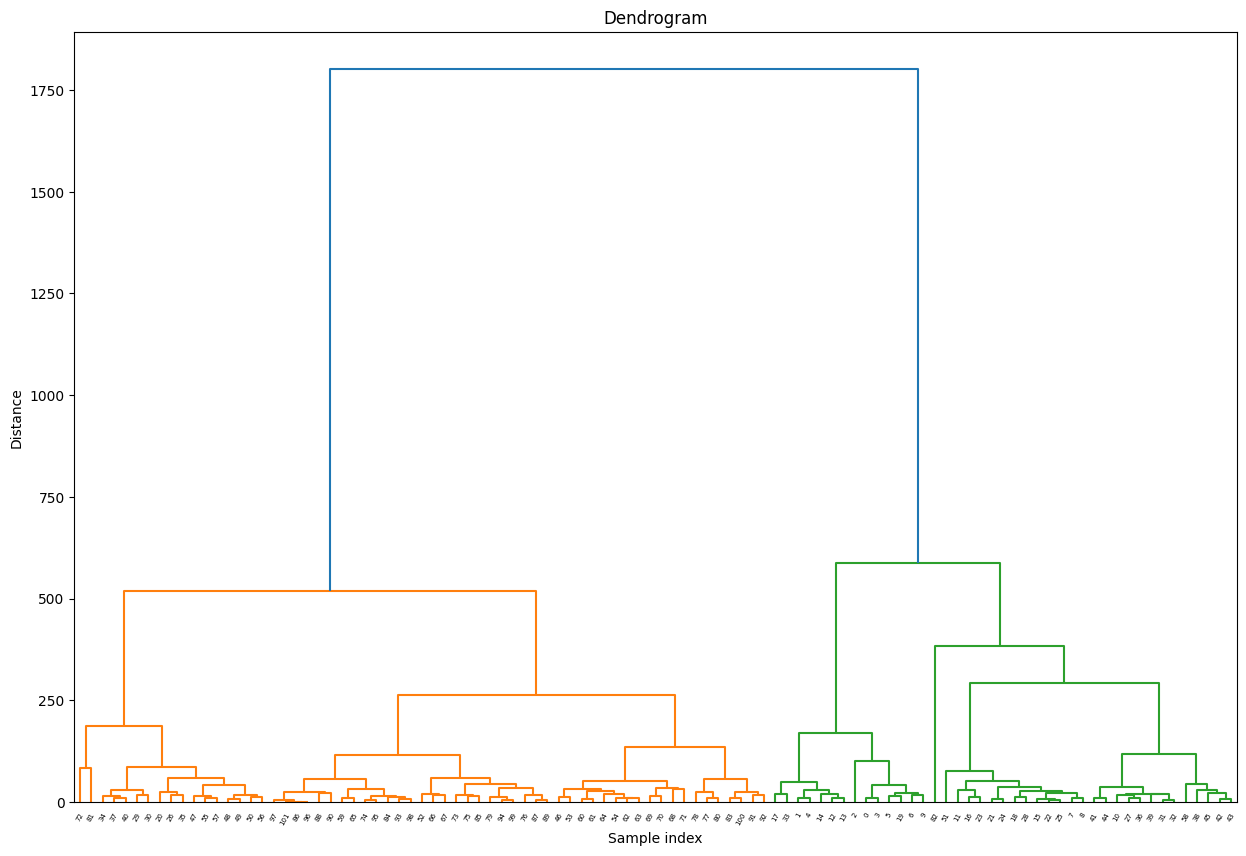

In [84]:
from scipy.cluster.hierarchy import linkage, dendrogram

linkage_matrix = linkage(cc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linkage_matrix)
plt.title('Dendrogram')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.xticks(rotation=60)
plt.show()

In [85]:
from sklearn.cluster import AgglomerativeClustering


num_clusters = 2

model = AgglomerativeClustering(n_clusters=num_clusters, linkage='ward')
# clusters = model.fit_predict(scaled_data)
clusters = model.fit_predict(cc)

silhouette_avg = silhouette_score(cc, clusters)
print(f'Silhouette Score: {silhouette_avg:.2f}')

best_scores_ball.append(("HIERARCHICAL",silhouette_avg))


Silhouette Score: 0.64


In [86]:
df4['Cluster'] = clusters
print(df4.head())

            Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   

   Best_Bowilng        Avg   Economy  Strikerate  4s  6s  Cluster  
0            20  15.965517  7.528455   12.724138   2   0        0  
1             9  16.791667  8.857143   11.375000   1   0        0  
2            29  21.750000  9.266327   14.083250   1   0        0  
3            23  20.772727  8.359705   14.909182   1   0        0  
4            10  18.761905  8.294737   13.571429   1   0        0  


In [87]:
df4.Cluster.value_counts().sort_index()


0    41
1    61
Name: Cluster, dtype: int64

In [88]:
df4['Cluster'] = df4['Cluster'].replace({0: 'Grade A', 1: 'Grade B'})

In [89]:
Grade_A = df4[df4['Cluster'] == 'Grade A']
Grade_A.head(10)

Player               TEAM  Inns  Overs  Runs  Wickets  \
0  Jhye Richardson    Perth Scorchers    17   61.3   463       29   
1    Ben Dwarshuis      Sydney Sixers    13   45.3   403       24   
2    Mark Steketee      Brisbane Heat    16   56.2   522       24   
3         Wes Agar  Adelaide Strikers    15   54.4   457       22   
4   Tanveer Sangha     Sydney Thunder    15   47.3   394       21   
5       Andrew Tye    Perth Scorchers    16   54.1   433       21   
6     Nathan Ellis  Hobart Hurricanes    14   53.5   446       20   
7     Peter Siddle  Adelaide Strikers    13   43.2   323       19   
8       Adam Zampa    Melbourne Stars    12   45.1   332       19   
9     Scott Boland  Hobart Hurricanes    14   54.2   432       17   

   Best_Bowilng        Avg   Economy  Strikerate  4s  6s  Cluster  
0            20  15.965517  7.528455   12.724138   2   0  Grade A  
1             9  16.791667  8.857143   11.375000   1   0  Grade A  
2            29  21.750000  9.266327   14.083250   1   0  Grade A  
3            23  20.772727  8.359705   14.909182   1   0  Grade A  
4            10  18.761905  8.294737   13.571429   1   0  Grade A  
5            16  20.619048  7.993945   15.476000   1   0  Grade A  
6            30  22.300000  8.284881   16.149900   1   0  Grade A  
7            11  17.000000  7.453903   13.684105   0   1  Grade A  
8            12  17.473684  7.350662   14.262947   0   1  Grade A  
9            37  25.411765  7.950969   19.176353   1   0  Grade A

In [90]:
Grade_B = df4[df4['Cluster'] == 'Grade B']
Grade_B.head(10)

Player                 TEAM  Inns  Overs  Runs  Wickets  \
20     Mujeeb Ur Rahman        Brisbane Heat     8   30.0   188       14   
26  Nathan Coulter-Nile      Melbourne Stars     6   21.5   172       11   
29            Zak Evans  Melbourne Renegades     5   15.0   146       10   
30   Marnus Labuschagne        Brisbane Heat     6   17.0   146       10   
34      Brendan Doggett       Sydney Thunder     5   18.1   120        9   
35     Mitchell Swepson        Brisbane Heat     6   24.0   162        9   
37       James Faulkner    Hobart Hurricanes     5   17.4   132        8   
40          Sean Abbott        Sydney Sixers     4   14.0   131        7   
46     Liam Livingstone      Perth Scorchers     6   10.0    85        5   
47         Sam Rainbird      Melbourne Stars     5   18.0   149        5   

    Best_Bowilng        Avg   Economy  Strikerate  4s  6s  Cluster  
20            10  13.428571  6.266667   12.857143   0   1  Grade B  
26             6  15.636364  7.877983   11.908909   1   0  Grade B  
29            28  14.600000  9.733333    9.000000   0   1  Grade B  
30            10  14.600000  8.588235   10.200000   0   0  Grade B  
34            18  13.333333  6.629834   12.066667   1   0  Grade B  
35            18  18.000000  6.750000   16.000000   0   0  Grade B  
37            18  16.500000  7.471557   13.250250   0   0  Grade B  
40            26  18.714286  9.357143   12.000000   0   0  Grade B  
46             8  17.000000  8.500000   12.000000   0   0  Grade B  
47            20  29.800000  8.277778   21.600000   0   0  Grade B

In [91]:
df4[34:43]

Player               TEAM  Inns  Overs  Runs  Wickets  \
34     Brendan Doggett     Sydney Thunder     5   18.1   120        9   
35    Mitchell Swepson      Brisbane Heat     6   24.0   162        9   
36           Jake Ball      Sydney Sixers     7   24.0   267        9   
37      James Faulkner  Hobart Hurricanes     5   17.4   132        8   
38  Sandeep Lamichhane  Hobart Hurricanes     8   31.0   234        8   
39        D Arcy Short  Hobart Hurricanes    14   32.0   254        8   
40         Sean Abbott      Sydney Sixers     4   14.0   131        7   
41       Lewis Gregory      Brisbane Heat    11   27.0   275        7   
42       Glenn Maxwell    Melbourne Stars    12   28.5   221        7   

    Best_Bowilng        Avg    Economy  Strikerate  4s  6s  Cluster  
34            18  13.333333   6.629834   12.066667   1   0  Grade B  
35            18  18.000000   6.750000   16.000000   0   0  Grade B  
36            22  29.666667  11.125000   16.000000   0   0  Grade A  
37            18  16.500000   7.471557   13.250250   0   0  Grade B  
38            22  29.250000   7.548387   23.250000   0   0  Grade A  
39            15  31.750000   7.937500   24.000000   0   0  Grade A  
40            26  18.714286   9.357143   12.000000   0   0  Grade B  
41            19  39.285714  10.185185   23.142857   0   0  Grade A  
42            10  31.571429   7.664828   24.714000   0   0  Grade A

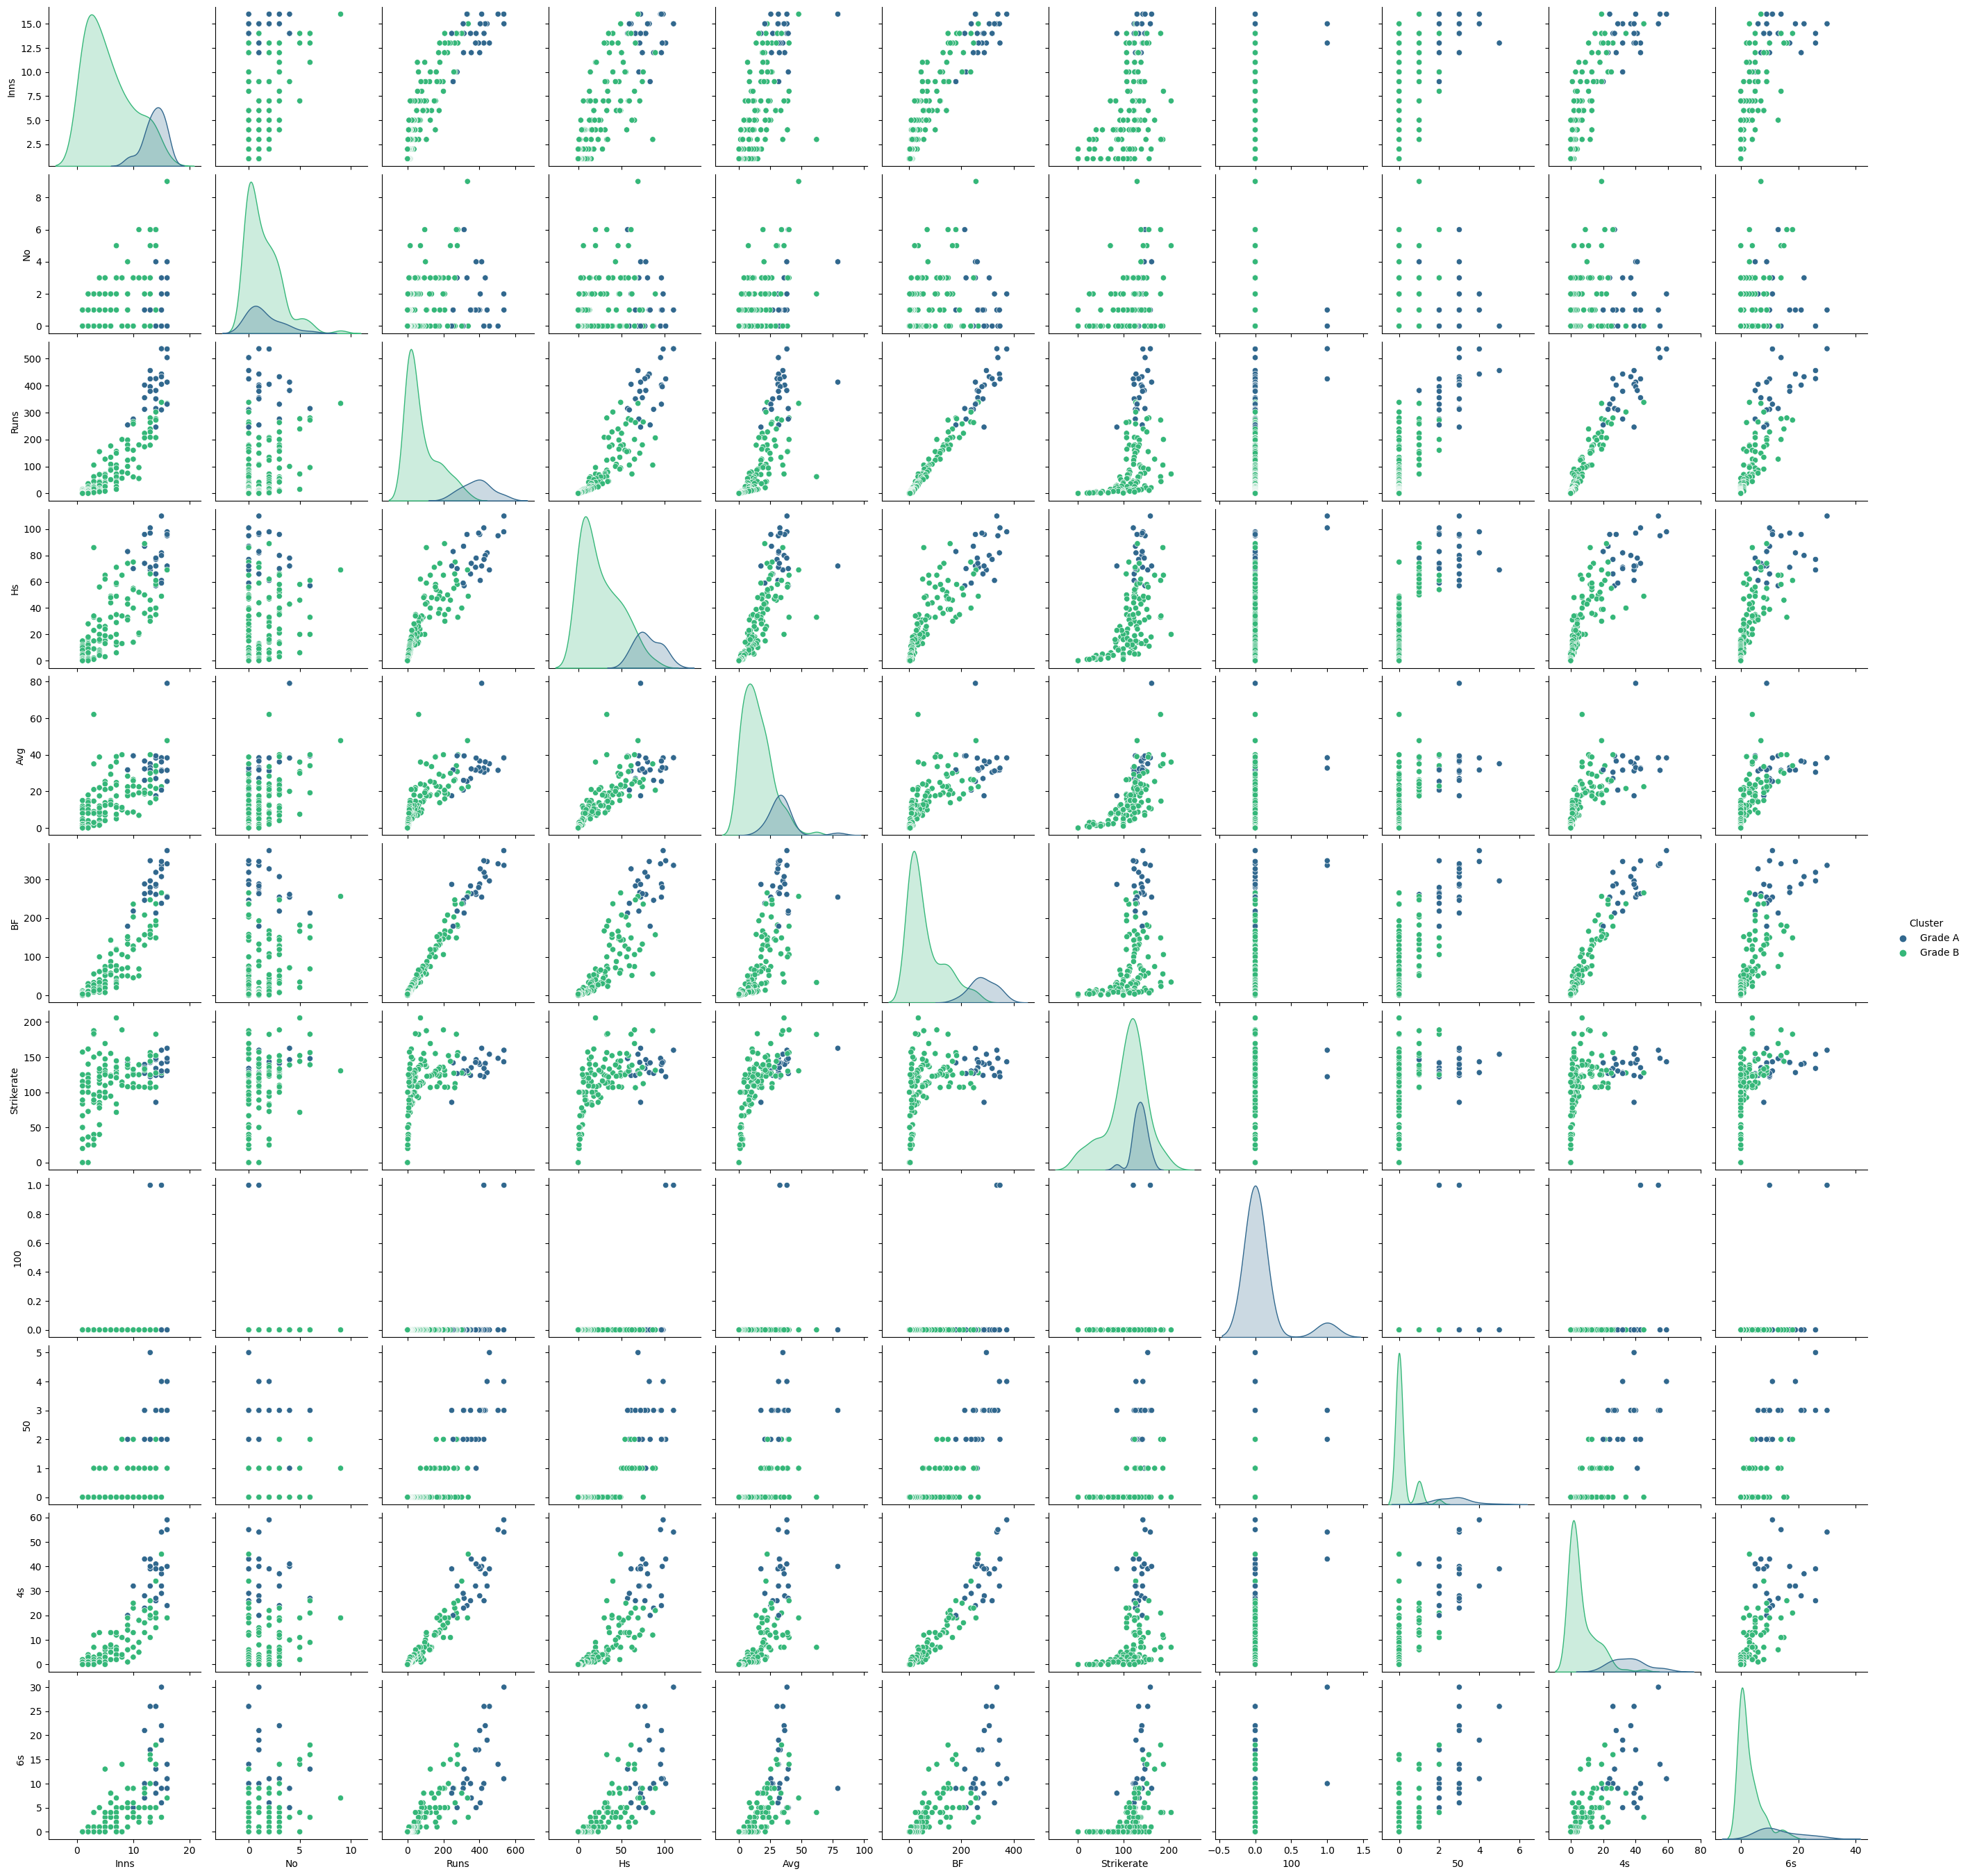

In [92]:
sns.pairplot(df3, hue='Cluster', palette='viridis')
plt.show()

# BEST

In [93]:
print(best_scores_bat)
print(best_scores_ball)

[('Kmeans', 0.6534867078634372), ('HIERARCHICAL', 0.6488369175970649)]
[('Kmeans', 0.6442157759973155), ('HIERARCHICAL', 0.6413200474796587)]


In [94]:
the_best_bat = max(best_scores_bat)
the_best_ball = max(best_scores_ball)

print(the_best_bat)
print(the_best_ball)

('Kmeans', 0.6534867078634372)
('Kmeans', 0.6442157759973155)


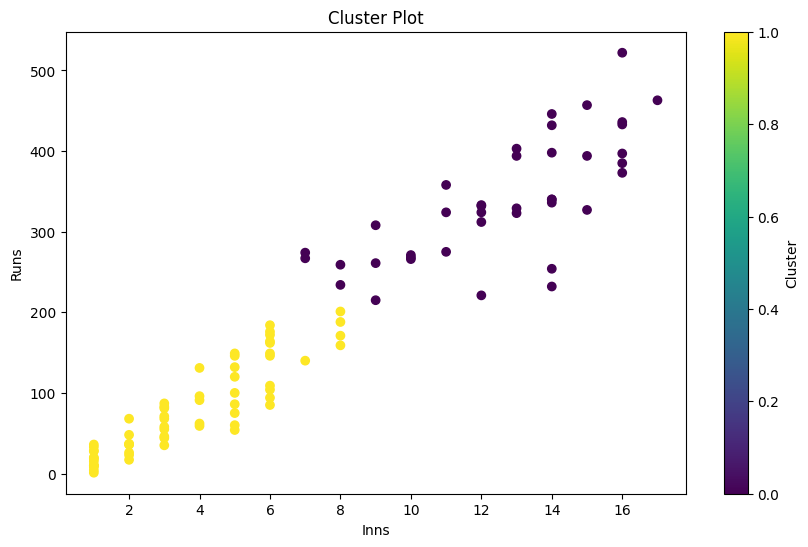

Best Clustering Method: KMeans
Best Silhouette Score: 0.6441646846374318
              Inns        Runs        Avg  Strikerate   Wickets  Best_Bowilng  \
Cluster                                                                         
0        12.550000  337.900000  33.125599   24.106395  13.72500     20.700000   
1         3.709677   79.419355  31.011762   24.196975   2.83871     17.435484   

          Economy  Rank  
Cluster                  
0        8.142335   1.0  
1        9.299950   2.0  


In [95]:
from MODEL import DataDrivenRankingSystem

cluster_bbl_ball = DataDrivenRankingSystem('/Users/rahuljogi/Desktop/@S4/ML/Project__/Datasets/BBL/pre_processed_data_bbl_ball.csv',2)
cluster_bbl1 = cluster_bbl_ball.process('/Users/rahuljogi/Desktop/@S4/ML/Project__/Datasets/BBL/pre_processed_data_bbl_ball.csv')
print(cluster_bbl1.head(10))

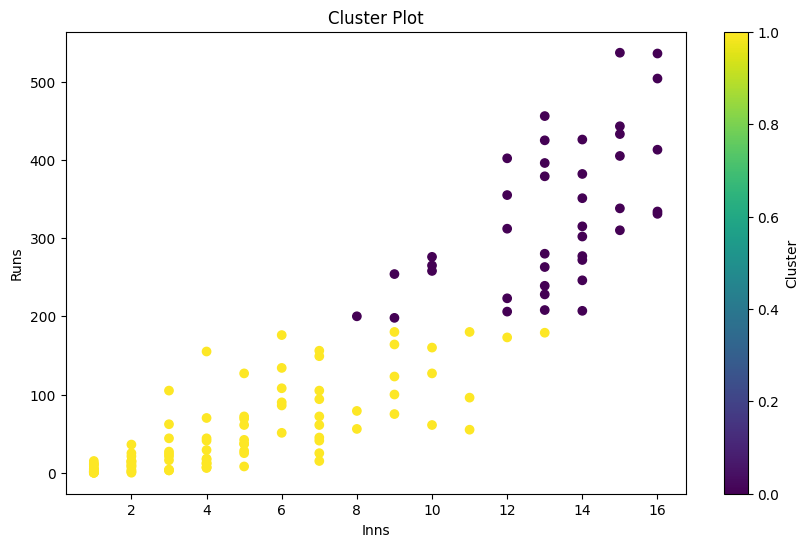

Best Clustering Method: KMeans
Best Silhouette Score: 0.6426781545743173
              Inns        Runs        Avg  Strikerate         4s         6s  \
Cluster                                                                       
0        13.225000  329.625000  31.331250  136.222250  29.825000  11.750000   
1         4.438776   48.112245  12.267551  103.424592   3.826531   1.734694   

         Rank  
Cluster        
0         1.0  
1         2.0  


In [96]:
cluster_bbl_bat = DataDrivenRankingSystem('/Users/rahuljogi/Desktop/@S4/ML/Project__/Datasets/BBL/pre_processed_data_bbl_bat.csv',2)
cluster_bbl1 = cluster_bbl_bat.process('/Users/rahuljogi/Desktop/@S4/ML/Project__/Datasets/BBL/pre_processed_data_bbl_bat.csv')
print(cluster_bbl1.head(10))